# Does increased urban population in South Asia affect dietary intake?

## Introduction

### Background

In recent years, South Asia has witnessed a significant shift in its demographic landscape, characterized predominantly by rapid urbanization. This transformation presents a unique opportunity to explore the dynamics between urban population growth and various facets of food security, including dietary intake. Understanding these dynamics is crucial, as dietary habits are a key indicator of a population's overall health and well-being.

### Project Overview

This project aims to examine the correlation, regression, and projected trends between urban and total population data and various indicators of food security. These indicators include average daily supplies of carbohydrates, fat, and protein, as well as the prevalence of obesity and undernourishment within the population. By exploring these relationships, the project seeks to uncover insights into how urbanization in South Asia potentially influences dietary patterns and food security.

### Objectives

1. **Correlation Analysis**: To identify and analyze the strength and direction of the relationship between the rise in urban population and changes in dietary intake patterns.
2. **Regression Analysis**: To understand how variables related to urban population growth predict changes in dietary intake, including the consumption of key macronutrients and the prevalence of obesity and undernourishment.
3. **Trend Projection**: To forecast future dietary trends based on current and historical patterns of urban population growth.

### Data Sources

The project will utilize a combination of publicly available datasets and reports from credible sources such as the World Bank, Food and Agriculture Organization (FAO), and regional health and statistical agencies. This data will encompass historical and current statistics on urban and total population figures, alongside comprehensive food security indicators.

### Significance

With South Asia at the crossroads of rapid urbanization, this project is timely and significant. It will provide valuable insights for policymakers, public health officials, and urban planners to address the challenges and opportunities that come with urban growth, particularly in relation to food security and dietary health. The findings may also offer guidance for implementing targeted interventions and policies aimed at improving the nutritional status of the urban population in South Asia.

## Setup and Preliminaries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress
import statsmodels.api as sm
import seaborn as sns
import numpy as np

## Raw Data

#### Raw Population Data

In [ ]:
raw_population_path = "https://github.com/nghiapham1026/UrbanizationAndFoodConsumption/raw/main/data/raw/Population_E_Asia/Population_E_Asia_NOFLAG.csv"

raw_population_data = pd.read_csv(raw_population_path, encoding='ISO-8859-1')
raw_population_data

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Unit,Y1950,Y1951,...,Y2091,Y2092,Y2093,Y2094,Y2095,Y2096,Y2097,Y2098,Y2099,Y2100
0,2,'004,Afghanistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1000 No,7480.461,7571.537,...,108041.524,108430.416,108801.262,109153.078,109487.140,109802.281,110094.664,110366.921,110621.216,110854.784
1,2,'004,Afghanistan,3010,Population - Est. & Proj.,512,Total Population - Male,1000 No,3962.260,4001.601,...,53210.424,53387.995,53557.202,53717.654,53870.066,54013.859,54147.379,54272.065,54388.865,54496.126
2,2,'004,Afghanistan,3010,Population - Est. & Proj.,513,Total Population - Female,1000 No,3518.202,3569.936,...,54831.100,55042.421,55244.061,55435.425,55617.075,55788.423,55947.285,56094.857,56232.351,56358.658
3,2,'004,Afghanistan,3010,Population - Est. & Proj.,551,Rural population,1000 No,7286.991,7352.856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,'004,Afghanistan,3010,Population - Est. & Proj.,561,Urban population,1000 No,465.127,486.654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,249,'887,Yemen,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1000 No,4712.810,4782.787,...,73155.783,73319.167,73470.144,73607.560,73731.166,73842.897,73943.565,74031.957,74108.751,74176.034
251,249,'887,Yemen,3010,Population - Est. & Proj.,512,Total Population - Male,1000 No,2379.598,2411.363,...,35985.438,36062.062,36133.063,36197.798,36256.298,36309.707,36358.563,36402.209,36440.904,36475.931
252,249,'887,Yemen,3010,Population - Est. & Proj.,513,Total Population - Female,1000 No,2333.211,2371.423,...,37170.346,37257.105,37337.081,37409.761,37474.868,37533.190,37585.002,37629.747,37667.848,37700.103
253,249,'887,Yemen,3010,Population - Est. & Proj.,551,Rural population,1000 No,4146.985,4202.134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Raw Dietary Data

In [ ]:
raw_dietary_path = "https://raw.githubusercontent.com/nghiapham1026/UrbanizationAndFoodConsumption/main/data/raw/Food_Security_Data_E_Asia/Food_Security_Data_E_Asia_NOFLAG.csv"

raw_dietary_data = pd.read_csv(raw_dietary_path, encoding='ISO-8859-1')
raw_dietary_data

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Unit,Y2000,Y20002002,...,Y2017,Y20172019,Y2018,Y20182020,Y2019,Y20192021,Y2020,Y20202022,Y2021,Y2022
0,2,'004,Afghanistan,21010,Average dietary energy supply adequacy (percen...,6121,Value,%,NaN,88,...,NaN,107,NaN,106,NaN,106,NaN,107,NaN,NaN
1,2,'004,Afghanistan,21012,Share of dietary energy supply derived from ce...,6121,Value,%,NaN,77,...,NaN,71,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN
2,2,'004,Afghanistan,21013,Average protein supply (g/cap/day) (3-year ave...,6123,Value,g/cap/d,NaN,51.4,...,NaN,57.3,NaN,56.3,NaN,NaN,NaN,NaN,NaN,NaN
3,2,'004,Afghanistan,21014,Average supply of protein of animal origin (g/...,6123,Value,g/cap/d,NaN,13,...,NaN,10.3,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN
4,2,'004,Afghanistan,22013,"Gross domestic product per capita, PPP, (const...",6126,Value,I$,NaN,NaN,...,2096.1,NaN,2060.7,NaN,2079.9,NaN,1968.3,NaN,1516.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462,249,'887,Yemen,21056,Minimum dietary energy requirement (kcal/cap/...,6128,Value,kcal/cap/d,1630,NaN,...,1695,NaN,1698,NaN,1701,NaN,1704,NaN,1708,1712
3463,249,'887,Yemen,21057,Average dietary energy requirement (kcal/cap/day),6128,Value,kcal/cap/d,2062,NaN,...,2162,NaN,2167,NaN,2171,NaN,2175,NaN,2180,2186
3464,249,'887,Yemen,21058,Coefficient of variation of habitual caloric c...,6173,Value,No,0.28,NaN,...,0.37,NaN,0.37,NaN,0.36,NaN,0.37,NaN,0.37,0.36
3465,249,'887,Yemen,21059,Incidence of caloric losses at retail distribu...,6121,Value,%,3.6,NaN,...,2.56,NaN,2.56,NaN,2.56,NaN,2.56,NaN,2.56,2.56


## Data Preprocessing

#### Filter population data

###### Include only South Asian countries (India, Pakistan, Bangladesh, Bhutan, Nepal)

In [ ]:
# List of South Asian countries to include
south_asian_countries = ['India', 'Pakistan', 'Bangladesh', 'Nepal', 'Bhutan']

# Filter the data to include only the selected South Asian countries
population_data_processed = raw_population_data[raw_population_data['Area'].isin(south_asian_countries)]

population_data_processed

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Unit,Y1950,Y1951,...,Y2091,Y2092,Y2093,Y2094,Y2095,Y2096,Y2097,Y2098,Y2099,Y2100
20,16,'050,Bangladesh,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1000 No,39728.535,40548.590,...,187014.794,185865.478,184699.322,183524.177,182342.109,181152.810,179959.517,178762.530,177563.935,176366.038
21,16,'050,Bangladesh,3010,Population - Est. & Proj.,512,Total Population - Male,1000 No,20741.251,21151.554,...,91116.649,90549.258,89973.182,89392.915,88809.294,88222.399,87634.091,87043.781,86452.163,85860.281
22,16,'050,Bangladesh,3010,Population - Est. & Proj.,513,Total Population - Female,1000 No,18987.283,19397.036,...,95898.145,95316.220,94726.140,94131.261,93532.814,92930.411,92325.426,91718.749,91111.773,90505.757
23,16,'050,Bangladesh,3010,Population - Est. & Proj.,551,Rural population,1000 No,36272.042,37018.844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,16,'050,Bangladesh,3010,Population - Est. & Proj.,561,Urban population,1000 No,1622.639,1686.232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,18,'064,Bhutan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1000 No,176.367,179.833,...,704.156,698.303,692.523,686.831,681.222,675.688,670.235,664.871,659.602,654.430
26,18,'064,Bhutan,3010,Population - Est. & Proj.,512,Total Population - Male,1000 No,90.556,92.385,...,352.115,349.220,346.377,343.586,340.846,338.148,335.491,332.882,330.320,327.805
27,18,'064,Bhutan,3010,Population - Est. & Proj.,513,Total Population - Female,1000 No,85.810,87.449,...,352.041,349.083,346.145,343.245,340.377,337.540,334.743,331.988,329.283,326.625
28,18,'064,Bhutan,3010,Population - Est. & Proj.,551,Rural population,1000 No,173.084,176.817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,18,'064,Bhutan,3010,Population - Est. & Proj.,561,Urban population,1000 No,3.713,4.008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Inlude only relevant fields (Total Population - Both sexes, Urban population)

In [ ]:
# Define the items to keep
items_to_keep = ['Total Population - Both sexes', 'Urban population']

# Filter the dataset
population_data_processed = population_data_processed[population_data_processed['Element'].isin(items_to_keep)]

population_data_processed

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Unit,Y1950,Y1951,...,Y2091,Y2092,Y2093,Y2094,Y2095,Y2096,Y2097,Y2098,Y2099,Y2100
20,16,'050,Bangladesh,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1000 No,39728.535,40548.590,...,187014.794,185865.478,184699.322,183524.177,182342.109,181152.810,179959.517,178762.530,177563.935,176366.038
24,16,'050,Bangladesh,3010,Population - Est. & Proj.,561,Urban population,1000 No,1622.639,1686.232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,18,'064,Bhutan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1000 No,176.367,179.833,...,704.156,698.303,692.523,686.831,681.222,675.688,670.235,664.871,659.602,654.430
29,18,'064,Bhutan,3010,Population - Est. & Proj.,561,Urban population,1000 No,3.713,4.008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,100,'356,India,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1000 No,357021.100,364922.360,...,1591484.819,1584943.121,1578296.205,1571569.451,1564797.337,1557945.219,1551000.309,1543990.229,1536933.462,1529850.119
79,100,'356,India,3010,Population - Est. & Proj.,561,Urban population,1000 No,64134.136,66175.821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,149,'524,Nepal,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1000 No,8398.945,8579.831,...,35670.935,35463.618,35254.173,35043.793,34832.626,34620.913,34408.587,34195.393,33982.584,33769.507
159,149,'524,Nepal,3010,Population - Est. & Proj.,561,Urban population,1000 No,227.119,237.987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,165,'586,Pakistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1000 No,37696.264,38215.785,...,479951.187,481003.034,481981.546,482893.235,483738.203,484519.107,485241.978,485893.422,486485.530,487017.405
169,165,'586,Pakistan,3010,Population - Est. & Proj.,561,Urban population,1000 No,6577.754,6813.980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Compute and format a separate population dataset into three-year average increments

This is necessary for some models requiring three-year average

In [ ]:
year_columns = [col for col in population_data_processed.columns if col.startswith('Y') and len(col) == 5]

# New DataFrame to store the average values
population_data_avg = population_data_processed[['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item', 'Element Code', 'Element', 'Unit']].copy()

# Calculate the average value for three-year periods and store in new columns
for i in range(0, len(year_columns), 3):
    # Check if there are at least 3 years left, if not, break the loop
    if i + 2 < len(year_columns):
        years = year_columns[i:i+3]
        avg_col_name = f'Y{years[0][1:]}{years[-1][1:]}'
        population_data_avg[avg_col_name] = population_data_processed[years].mean(axis=1)

population_data_avg

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Unit,Y19501952,Y19531955,...,Y20702072,Y20732075,Y20762078,Y20792081,Y20822084,Y20852087,Y20882090,Y20912093,Y20942096,Y20972099
20,16,'050,Bangladesh,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1000 No,40568.003333,43308.953000,...,2.042215e+05,2.025228e+05,2.004770e+05,1.980919e+05,1.954102e+05,1.924465e+05,1.892454e+05,1.858599e+05,1.823397e+05,1.787620e+05
24,16,'050,Bangladesh,3010,Population - Est. & Proj.,561,Urban population,1000 No,1687.068333,1896.842667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,18,'064,Bhutan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1000 No,179.915000,191.711000,...,8.236047e+02,8.080317e+02,7.908787e+02,7.725547e+02,7.536253e+02,7.346523e+02,7.161300e+02,6.983273e+02,6.812470e+02,6.649027e+02
29,18,'064,Bhutan,3010,Population - Est. & Proj.,561,Urban population,1000 No,4.015000,5.041667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,100,'356,India,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1000 No,364980.216000,389845.701000,...,1.687879e+06,1.679350e+06,1.668260e+06,1.654771e+06,1.639311e+06,1.622374e+06,1.604157e+06,1.584908e+06,1.564771e+06,1.543975e+06
79,100,'356,India,3010,Population - Est. & Proj.,561,Urban population,1000 No,65945.511667,70441.053000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,149,'524,Nepal,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1000 No,8579.556667,9110.718000,...,3.846399e+04,3.826988e+04,3.798875e+04,3.761907e+04,3.717100e+04,3.665224e+04,3.607618e+04,3.546291e+04,3.483244e+04,3.419552e+04
159,149,'524,Nepal,3010,Population - Est. & Proj.,561,Urban population,1000 No,238.044667,271.960333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,165,'586,Pakistan,3010,Population - Est. & Proj.,511,Total Population - Both sexes,1000 No,38242.942000,40245.148667,...,4.431206e+05,4.508489e+05,4.577235e+05,4.637498e+05,4.690246e+05,4.736097e+05,4.776000e+05,4.809786e+05,4.837168e+05,4.858736e+05
169,165,'586,Pakistan,3010,Population - Est. & Proj.,561,Urban population,1000 No,6820.924667,7654.846333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Filter Dietary Data

###### Include only South Asian countries (India, Pakistan, Bangladesh, Bhutan, Nepal)

In [ ]:
# List of South Asian countries to include
south_asian_countries = ['India', 'Pakistan', 'Bangladesh', 'Nepal', 'Bhutan']

# Filter the data to include only the selected South Asian countries
dietary_data_processed = raw_dietary_data[raw_dietary_data['Area'].isin(south_asian_countries)]

dietary_data_processed

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Unit,Y2000,Y20002002,...,Y2017,Y20172019,Y2018,Y20182020,Y2019,Y20192021,Y2020,Y20202022,Y2021,Y2022
273,16,'050,Bangladesh,21010,Average dietary energy supply adequacy (percen...,6121,Value,%,NaN,108,...,NaN,110,NaN,111,NaN,111,NaN,113,NaN,NaN
274,16,'050,Bangladesh,21012,Share of dietary energy supply derived from ce...,6121,Value,%,NaN,84,...,NaN,78,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN
275,16,'050,Bangladesh,21013,Average protein supply (g/cap/day) (3-year ave...,6123,Value,g/cap/d,NaN,49,...,NaN,60,NaN,60.7,NaN,NaN,NaN,NaN,NaN,NaN
276,16,'050,Bangladesh,21014,Average supply of protein of animal origin (g/...,6123,Value,g/cap/d,NaN,6.3,...,NaN,12,NaN,12.3,NaN,NaN,NaN,NaN,NaN,NaN
277,16,'050,Bangladesh,21016,Rail lines density (total route in km per 100 ...,6124,Value,km,1.8,NaN,...,1.9,NaN,1.9,NaN,1.9,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304,165,'586,Pakistan,21056,Minimum dietary energy requirement (kcal/cap/...,6128,Value,kcal/cap/d,1695,NaN,...,1728,NaN,1730,NaN,1732,NaN,1734,NaN,1737,1740
2305,165,'586,Pakistan,21057,Average dietary energy requirement (kcal/cap/day),6128,Value,kcal/cap/d,2156,NaN,...,2213,NaN,2215,NaN,2218,NaN,2222,NaN,2226,2231
2306,165,'586,Pakistan,21058,Coefficient of variation of habitual caloric c...,6173,Value,No,0.32,NaN,...,0.24,NaN,0.24,NaN,0.24,NaN,0.3,NaN,0.32,0.33
2307,165,'586,Pakistan,21059,Incidence of caloric losses at retail distribu...,6121,Value,%,2.81,NaN,...,3.28,NaN,3.28,NaN,3.28,NaN,3.28,NaN,3.28,3.28


###### Include only relevant fields: Average dietary energy requirement, Number of people undernourished, Number of children under 5 years of age who are overweight, Number of obese adults, Average protein supply, Share of dietary energy supply derived from cereals, roots and tubers, Average fat supply

In [ ]:
# List of fields to filter
fields_to_include = ["Average dietary energy requirement (kcal/cap/day)",
                         "Number of people undernourished (million) (3-year average)",
                         "Number of children under 5 years of age who are overweight (modeled estimates) (million)",
                         "Number of obese adults (18 years and older) (million)",
                         "Average protein supply (g/cap/day) (3-year average)",
                         "Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",
                         "Average fat supply (g/cap/day) (3-year average)"]

# Filter the data to include only the selected South Asian countries and specified fields
dietary_data_processed = dietary_data_processed[dietary_data_processed['Item'].isin(fields_to_include)]

dietary_data_processed

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Unit,Y2000,Y20002002,...,Y2017,Y20172019,Y2018,Y20182020,Y2019,Y20192021,Y2020,Y20202022,Y2021,Y2022
274,16,'050,Bangladesh,21012,Share of dietary energy supply derived from ce...,6121,Value,%,NaN,84,...,NaN,78,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN
275,16,'050,Bangladesh,21013,Average protein supply (g/cap/day) (3-year ave...,6123,Value,g/cap/d,NaN,49,...,NaN,60,NaN,60.7,NaN,NaN,NaN,NaN,NaN,NaN
280,16,'050,Bangladesh,210011,Number of people undernourished (million) (3-y...,6132,Value,million No,NaN,20.5,...,NaN,20.7,NaN,19.6,NaN,19.5,NaN,18.9,NaN,NaN
332,16,'050,Bangladesh,210410,Number of children under 5 years of age who ar...,6132,Value,million No,0.1,NaN,...,0.3,NaN,0.3,NaN,0.3,NaN,0.3,NaN,0.3,0.3
334,16,'050,Bangladesh,210420,Number of obese adults (18 years and older) (m...,6132,Value,million No,0.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,16,'050,Bangladesh,21057,Average dietary energy requirement (kcal/cap/day),6128,Value,kcal/cap/d,2188,NaN,...,2285,NaN,2294,NaN,2298,NaN,2301,NaN,2304,2307
344,16,'050,Bangladesh,21061,Average fat supply (g/cap/day) (3-year average),6123,Value,g/cap/d,NaN,26.1,...,NaN,34.2,NaN,34.7,NaN,NaN,NaN,NaN,NaN,NaN
345,18,'064,Bhutan,21013,Average protein supply (g/cap/day) (3-year ave...,6123,Value,g/cap/d,NaN,NaN,...,NaN,29.5,NaN,59.5,NaN,NaN,NaN,NaN,NaN,NaN
349,18,'064,Bhutan,210011,Number of people undernourished (million) (3-y...,6132,Value,million No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,18,'064,Bhutan,210410,Number of children under 5 years of age who ar...,6132,Value,million No,<0.1,NaN,...,<0.1,NaN,<0.1,NaN,<0.1,NaN,<0.1,NaN,<0.1,<0.1


## Functions and Variables Setup

In [ ]:
from typing import Final, final

@final
def extract_relevant_data(df, element, item) -> pd.DataFrame:
    interval_columns: Final = [col for col in df.columns if 'Y' in col and len(col) == 9]
    return df[df['Element'] == element][['Area'] + interval_columns] if element else df[df['Item'] == item][['Area'] + interval_columns]

def reset_data():
    global urban_population, total_population, urban_data, total_pop_data, urban_population_melted, total_population_melted

    urban_population = extract_relevant_data(population_data_avg, 'Urban population', None)
    total_population = extract_relevant_data(population_data_avg, 'Total Population - Both sexes', None)
    urban_data = population_data_processed[population_data_processed['Element'] == 'Urban population']
    total_pop_data = population_data_processed[population_data_processed['Element'] == 'Total Population - Both sexes']
    urban_population_melted = urban_population.melt(id_vars='Area', var_name='Year', value_name='Urban Population')
    total_population_melted = total_population.melt(id_vars='Area', var_name='Year', value_name='Total Population')


reset_data()

## Exploratory Data Analysis

#### Population Models

###### Model of Population over Time

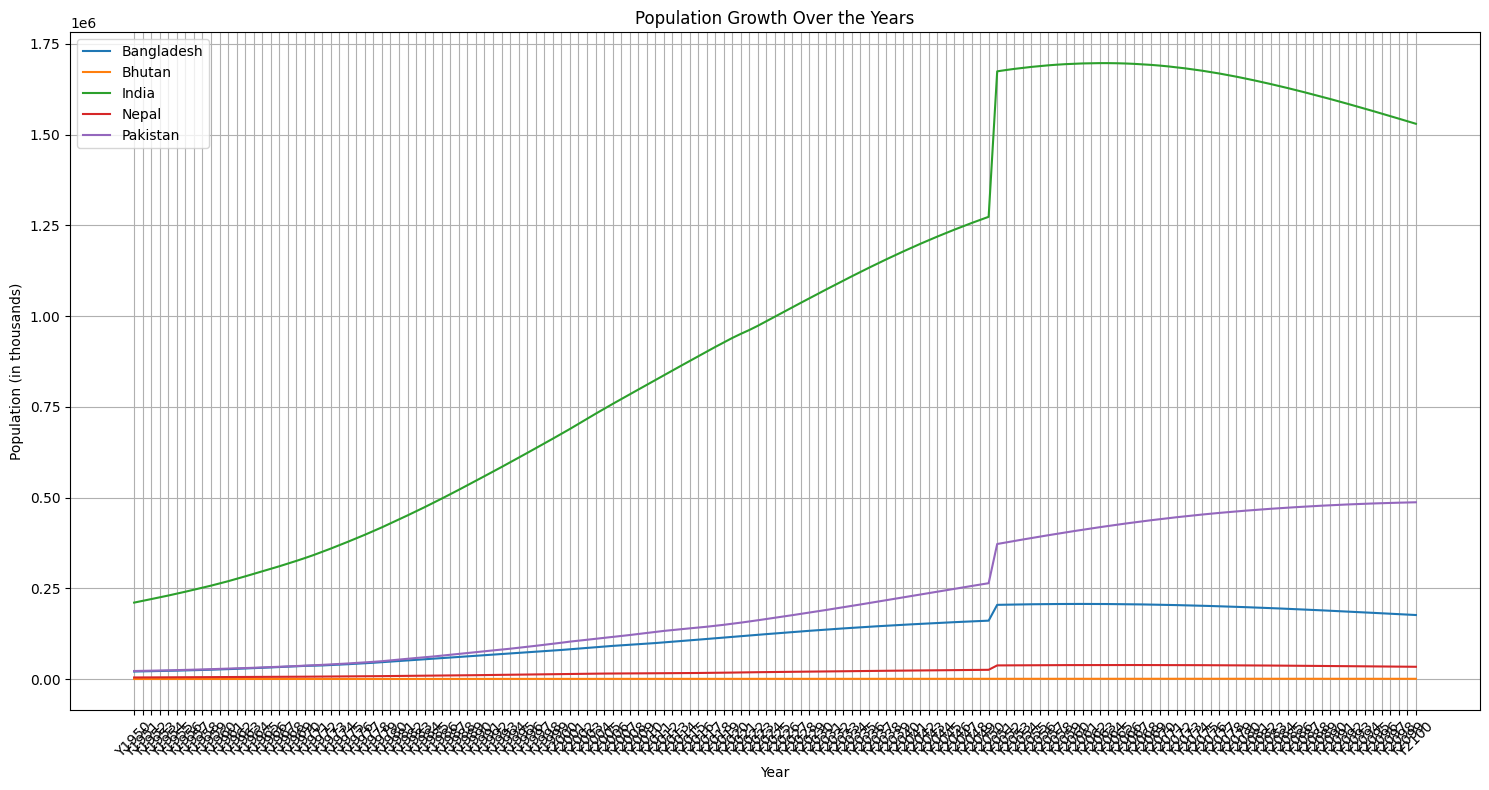

In [ ]:
# Extracting years from the columns (assuming year columns start with 'Y')
years = [col for col in population_data_processed.columns if col.startswith('Y')]

# Pivot the data to have years as columns and countries as rows
pivot_data = population_data_processed.pivot_table(index='Area', values=years)

# Plotting
plt.figure(figsize=(15, 8))
for country in pivot_data.index:
    country_data = pivot_data.loc[country, :]
    plt.plot(years, country_data.values, label=country)

plt.title('Population Growth Over the Years')
plt.xlabel('Year')
plt.ylabel('Population (in thousands)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout
plt.show()

reset_data()

###### Model of Percentage of Urban Population over Time

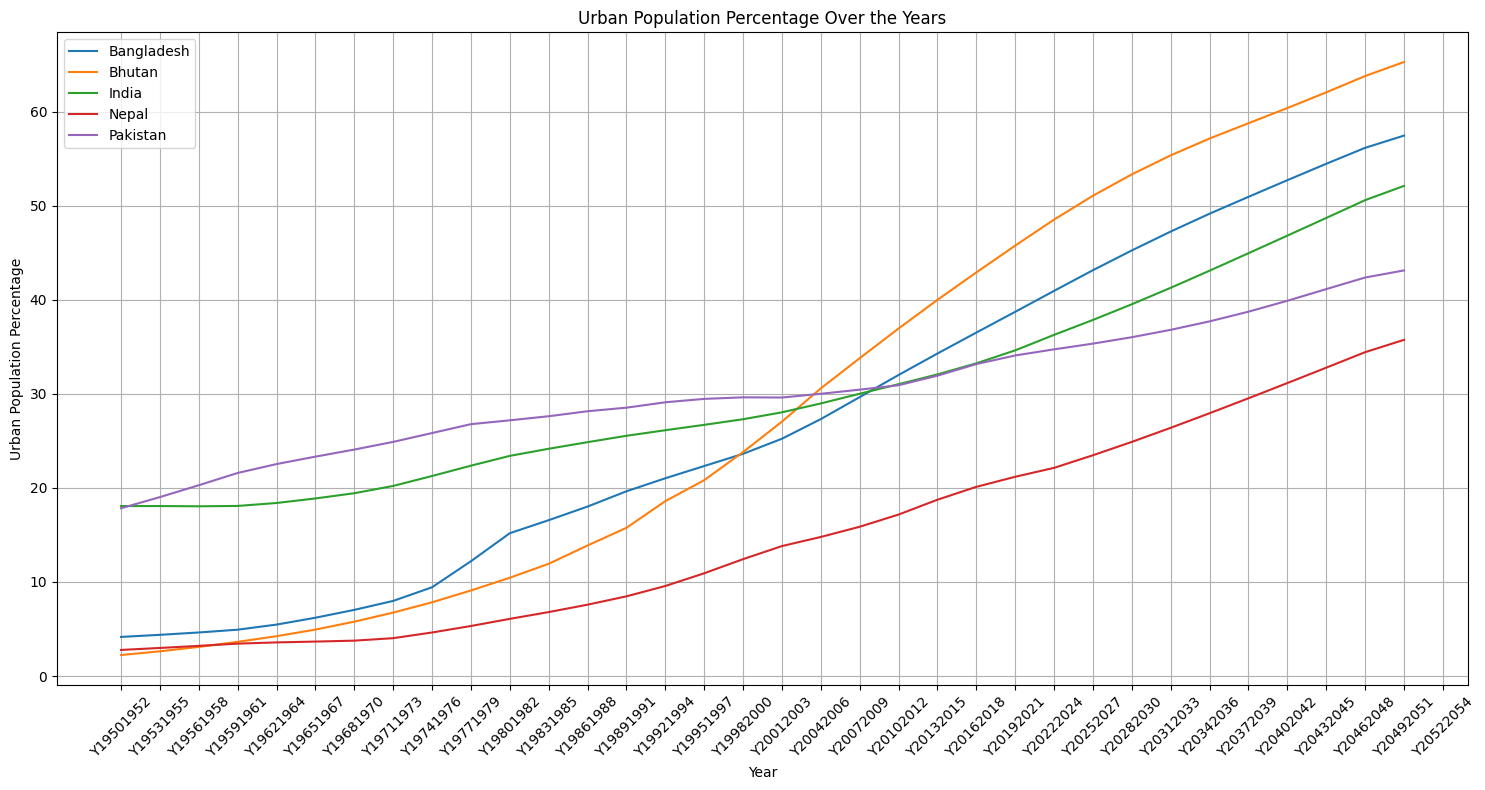

In [ ]:
# Convert year columns to numeric and calculate the urban population percentage
years = [col for col in total_population.columns if col.startswith('Y')]
urban_percentages = pd.DataFrame(index=total_population['Area'])

for year in years:
    urban_population_year = urban_population.set_index('Area')[year]
    total_population_year = total_population.set_index('Area')[year]
    urban_percentages[year] = (urban_population_year / total_population_year) * 100

# Plotting
plt.figure(figsize=(15, 8))
for country in urban_percentages.index:
    plt.plot(years, urban_percentages.loc[country], label=country)

plt.title('Urban Population Percentage Over the Years')
plt.xlabel('Year')
plt.ylabel('Urban Population Percentage')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

reset_data()

#### Dietary Models

###### Model of Number of Obese Adults over Time

<ipython-input-36-739d1b865da1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overweight_adults_data[year_columns] = overweight_adults_data[year_columns].apply(pd.to_numeric, errors='coerce')


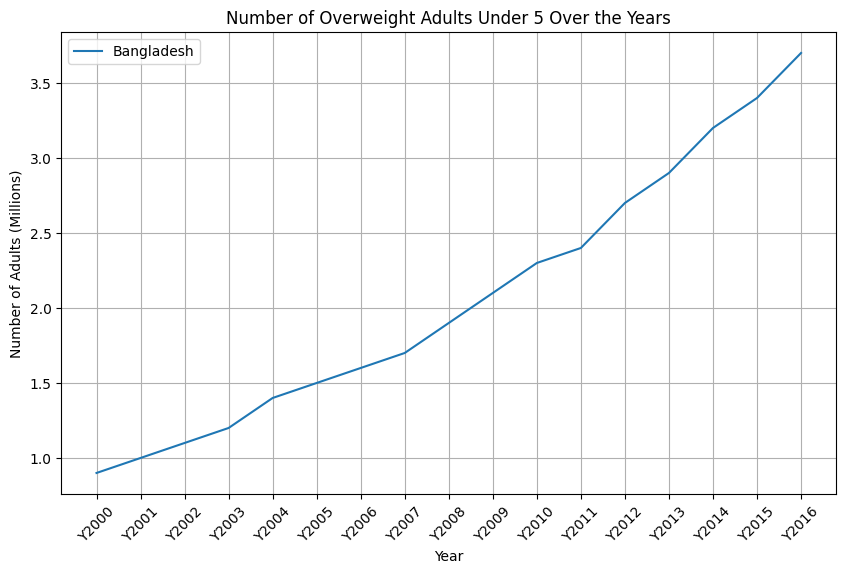

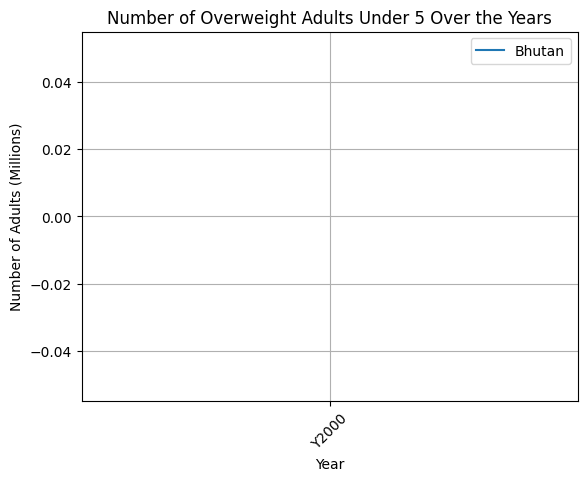

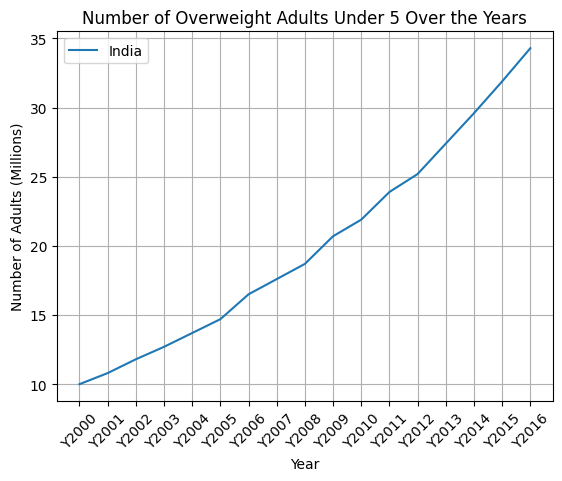

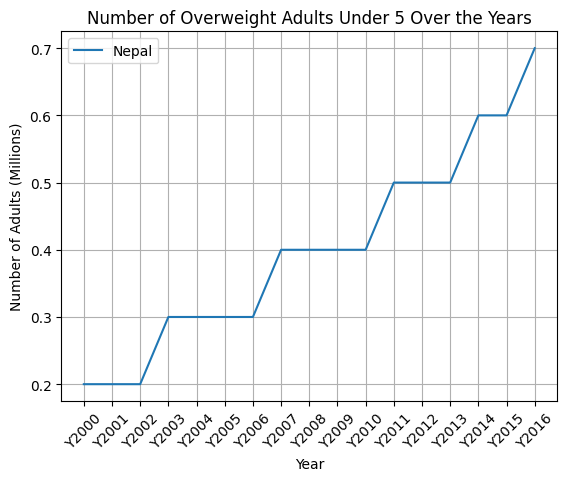

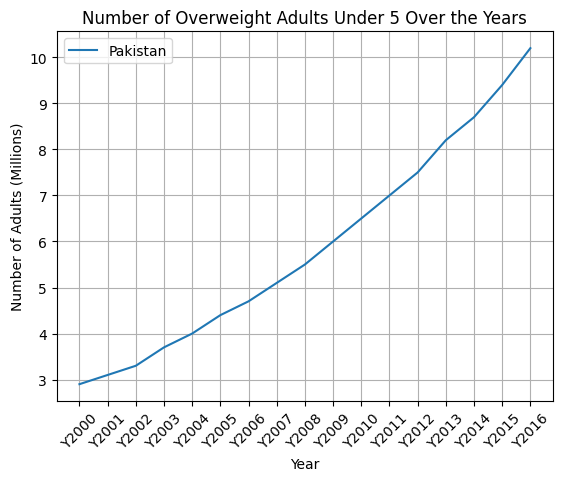

In [ ]:
# Filter for 'Number of adults under 5 years of age who are overweight'
overweight_adults_data = dietary_data_processed[dietary_data_processed['Item'] == 'Number of obese adults (18 years and older) (million)']

# Select only columns with year format 'Y2000', 'Y2001', etc.
year_columns = [col for col in overweight_adults_data.columns if col.startswith('Y') and len(col) == 5]

# Convert data to numeric, replacing non-numeric values with NaN
overweight_adults_data[year_columns] = overweight_adults_data[year_columns].apply(pd.to_numeric, errors='coerce')

# Plot
plt.figure(figsize=(10, 6))
for country in overweight_adults_data['Area'].unique():
    country_data = overweight_adults_data[overweight_adults_data['Area'] == country]
    plt.plot(country_data[year_columns].columns, country_data[year_columns].values.flatten(), label=country)

    plt.title('Number of Overweight Adults Under 5 Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Number of Adults (Millions)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

## Statistical Analysis

#### Regression Models of Population and Dietary Variables

###### Regression Model of Urban Population and Share of dietary energy supply derived from cereals, roots and tubers

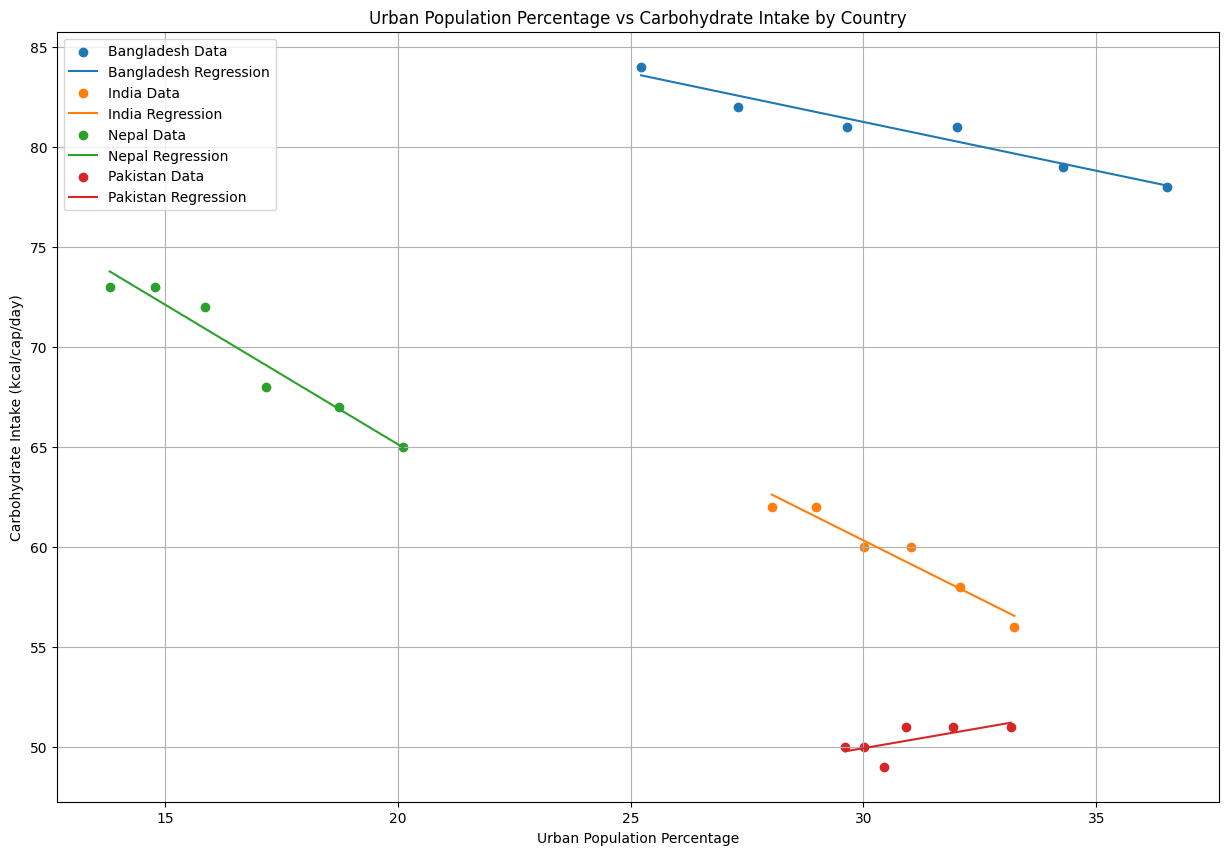

In [ ]:
carbohydrate_intake = extract_relevant_data(dietary_data_processed, None, 'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)')

# Reshape the data for merging
carbohydrate_intake_melted = carbohydrate_intake.melt(id_vars='Area', var_name='Year', value_name='Carbohydrate Intake')
# Merge the datasets
merged_data = pd.merge(pd.merge(urban_population_melted, total_population_melted, on=['Area', 'Year']), carbohydrate_intake_melted, on=['Area', 'Year'])

# Calculate Urban Population Percentage
merged_data['Urban Population Percentage'] = (merged_data['Urban Population'] / merged_data['Total Population']) * 100

# Drop NaN values
merged_data.dropna(subset=['Urban Population Percentage', 'Carbohydrate Intake'], inplace=True)

merged_data['Urban Population Percentage'] = merged_data['Urban Population Percentage'].astype(float)
merged_data['Carbohydrate Intake'] = merged_data['Carbohydrate Intake'].astype(float)

plt.figure(figsize=(15, 10))

# Loop through each country and perform regression
for country in merged_data['Area'].unique():
    country_data = merged_data[merged_data['Area'] == country]
    X = country_data['Urban Population Percentage']
    y = country_data['Carbohydrate Intake']
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    # Plotting each country's data and regression line
    plt.scatter(country_data['Urban Population Percentage'], country_data['Carbohydrate Intake'], label=f'{country} Data')
    plt.plot(country_data['Urban Population Percentage'], predictions, label=f'{country} Regression')

plt.title('Urban Population Percentage vs Carbohydrate Intake by Country')
plt.xlabel('Urban Population Percentage')
plt.ylabel('Carbohydrate Intake (kcal/cap/day)')
plt.legend()
plt.grid(True)
plt.show()

reset_data()

###### Regression Model of Urban Population and Average Dietary Energy Requirement

<ipython-input-38-a42528e11474>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dietary_data[year_columns] = dietary_data[year_columns].apply(pd.to_numeric, errors='coerce')


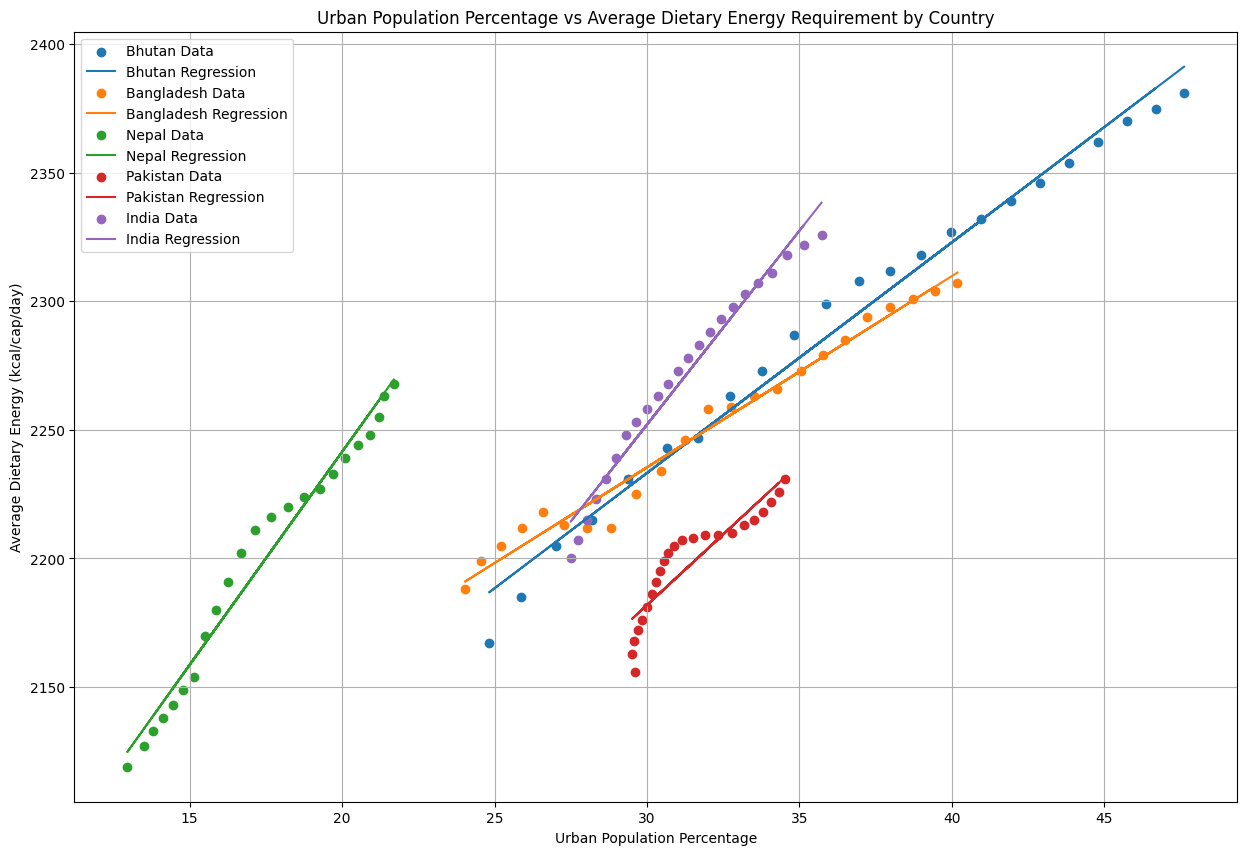

In [ ]:
dietary_data = dietary_data_processed[dietary_data_processed['Item'] == 'Average dietary energy requirement (kcal/cap/day)']

# Convert year columns to numeric and set index to 'Area' for both datasets
year_columns = [col for col in dietary_data.columns if col.startswith('Y') and len(col) == 5]
dietary_data[year_columns] = dietary_data[year_columns].apply(pd.to_numeric, errors='coerce')
dietary_data.set_index('Area', inplace=True)
total_pop_data.set_index('Area', inplace=True)
urban_data.set_index('Area', inplace=True)

merged_data_list = []

# Ensure only matching years and countries are merged
common_years = set(year_columns).intersection(urban_data.columns).intersection(total_pop_data.columns)
common_countries = list(set(dietary_data.index).intersection(urban_data.index).intersection(total_pop_data.index))

for year in common_years:
    urban_percentage = (urban_data.loc[common_countries, year] / total_pop_data.loc[common_countries, year]) * 100
    temp_df = pd.DataFrame({
        'Area': common_countries,
        'Year': int(year[1:]),
        'AverageDietaryEnergy': dietary_data.loc[common_countries, year].values,
        'UrbanPopulationPercentage': urban_percentage.values
    })
    merged_data_list.append(temp_df)

# Concatenate all dataframes in the list
merged_data = pd.concat(merged_data_list, ignore_index=True)

# Drop rows with NaN values and duplicates
merged_data.dropna(inplace=True)
merged_data.drop_duplicates(inplace=True)

plt.figure(figsize=(15, 10))

# Loop through each country and perform regression
for country in merged_data['Area'].unique():
    country_data = merged_data[merged_data['Area'] == country]
    X = country_data['UrbanPopulationPercentage']
    y = country_data['AverageDietaryEnergy']
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    # Plotting each country's data and regression line
    plt.scatter(country_data['UrbanPopulationPercentage'], country_data['AverageDietaryEnergy'], label=f'{country} Data')
    plt.plot(country_data['UrbanPopulationPercentage'], predictions, label=f'{country} Regression')

plt.title('Urban Population Percentage vs Average Dietary Energy Requirement by Country')
plt.xlabel('Urban Population Percentage')
plt.ylabel('Average Dietary Energy (kcal/cap/day)')
plt.legend()
plt.grid(True)
plt.show()

reset_data()

###### Regression Model of Urban Population and Average Fat Supply

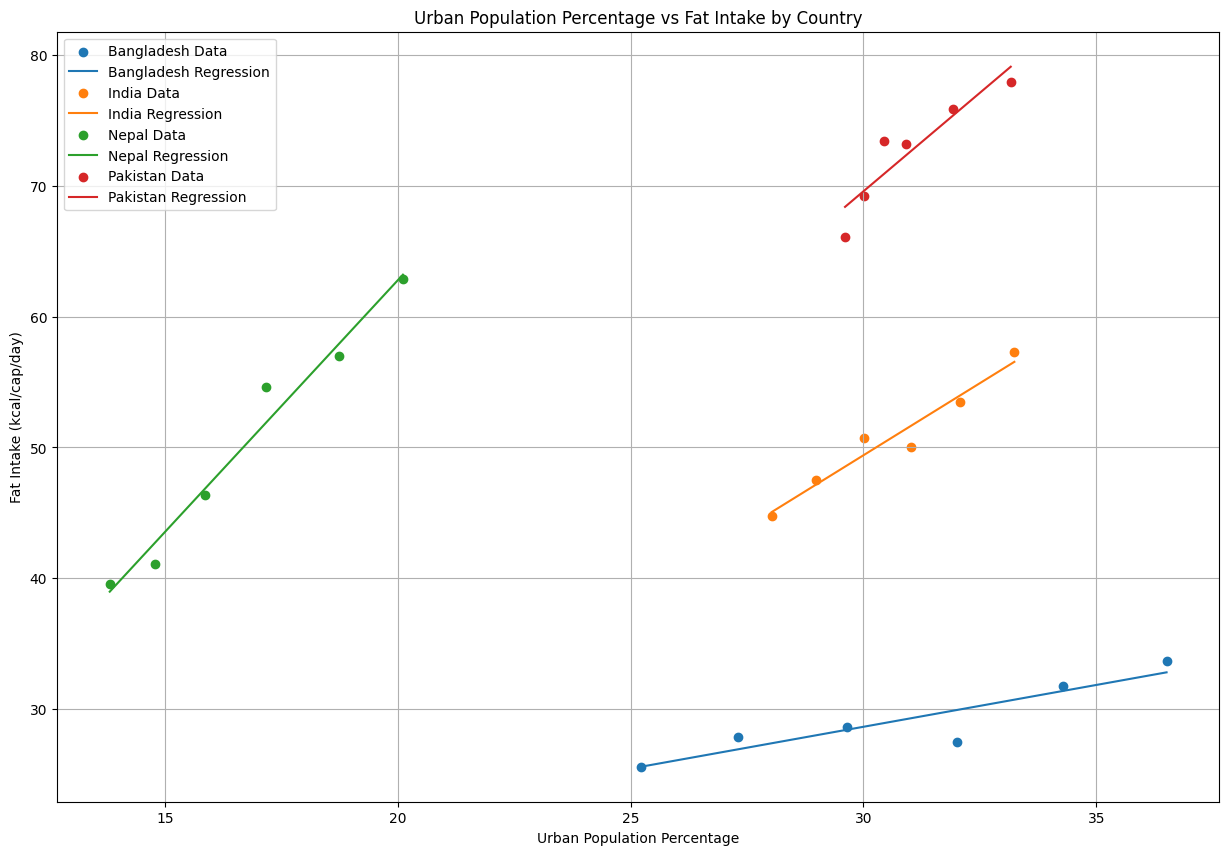

In [ ]:
fat_intake = extract_relevant_data(dietary_data_processed, None, 'Average fat supply (g/cap/day) (3-year average)')
fat_intake_melted = fat_intake.melt(id_vars='Area', var_name='Year', value_name='Fat Intake')

# Merge the datasets
merged_data = pd.merge(pd.merge(urban_population_melted, total_population_melted, on=['Area', 'Year']), fat_intake_melted, on=['Area', 'Year'])

# Calculate Urban Population Percentage
merged_data['Urban Population Percentage'] = (merged_data['Urban Population'] / merged_data['Total Population']) * 100

# Drop NaN values
merged_data.dropna(subset=['Urban Population Percentage', 'Fat Intake'], inplace=True)
merged_data['Urban Population Percentage'] = merged_data['Urban Population Percentage'].astype(float)
merged_data['Fat Intake'] = merged_data['Fat Intake'].astype(float)

plt.figure(figsize=(15, 10))

# Loop through each country and perform regression
for country in merged_data['Area'].unique():
    country_data = merged_data[merged_data['Area'] == country]
    X = country_data['Urban Population Percentage']
    y = country_data['Fat Intake']
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    # Plotting each country's data and regression line
    plt.scatter(country_data['Urban Population Percentage'], country_data['Fat Intake'], label=f'{country} Data')
    plt.plot(country_data['Urban Population Percentage'], predictions, label=f'{country} Regression')

plt.title('Urban Population Percentage vs Fat Intake by Country')
plt.xlabel('Urban Population Percentage')
plt.ylabel('Fat Intake (kcal/cap/day)')
plt.legend()
plt.grid(True)
plt.show()

reset_data()

###### Regression Model of Urban Population and Number of Obese Adults

<ipython-input-40-b24981f83671>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesity_data[year_columns] = obesity_data[year_columns].apply(pd.to_numeric, errors='coerce')


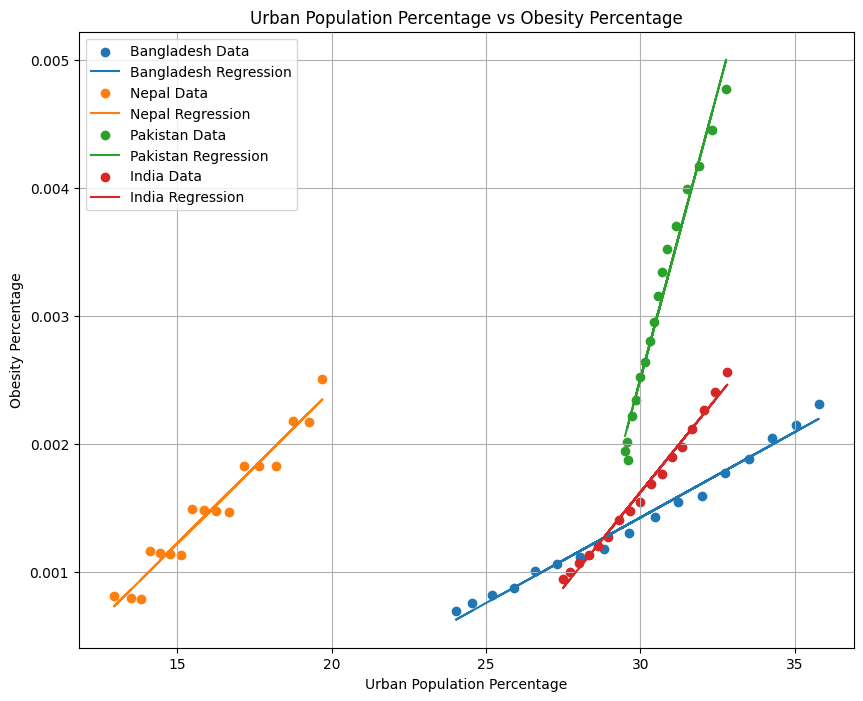

In [ ]:
obesity_data = dietary_data_processed[dietary_data_processed['Item'] == 'Number of obese adults (18 years and older) (million)']

# Convert year columns to numeric and set index to 'Area' for both datasets
year_columns = [col for col in obesity_data.columns if col.startswith('Y') and len(col) == 5]
obesity_data[year_columns] = obesity_data[year_columns].apply(pd.to_numeric, errors='coerce')
obesity_data.set_index('Area', inplace=True)
total_pop_data.set_index('Area', inplace=True)
urban_data.set_index('Area', inplace=True)

merged_data_list = []

# Ensure only matching years and countries are merged
common_years = set(year_columns).intersection(urban_data.columns).intersection(total_pop_data.columns)
common_countries = list(set(obesity_data.index).intersection(urban_data.index).intersection(total_pop_data.index))

for year in common_years:
    obesity_percentage = (obesity_data.loc[common_countries, year] / total_pop_data.loc[common_countries, year]) * 100
    urban_percentage = (urban_data.loc[common_countries, year] / total_pop_data.loc[common_countries, year]) * 100
    temp_df = pd.DataFrame({
        'Area': common_countries,
        'Year': int(year[1:]),
        'ObesityPercentage': obesity_percentage.values,
        'UrbanPopulationPercentage': urban_percentage.values
    })
    merged_data_list.append(temp_df)

merged_data = pd.concat(merged_data_list, ignore_index=True)

merged_data.dropna(inplace=True)
merged_data.drop_duplicates(inplace=True)

plt.figure(figsize=(10, 8))

# Loop through each country and perform regression
for country in merged_data['Area'].unique():
    country_data = merged_data[merged_data['Area'] == country]
    X = country_data['UrbanPopulationPercentage']
    y = country_data['ObesityPercentage']
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    # Plotting each country's data and regression line
    plt.scatter(country_data['UrbanPopulationPercentage'], country_data['ObesityPercentage'], label=f'{country} Data')
    plt.plot(country_data['UrbanPopulationPercentage'], predictions, label=f'{country} Regression')

plt.title('Urban Population Percentage vs Obesity Percentage')
plt.xlabel('Urban Population Percentage')
plt.ylabel('Obesity Percentage')
plt.legend()
plt.grid(True)
plt.show()

reset_data()

###### Regression Model of Urban Population and Average Protein Supply

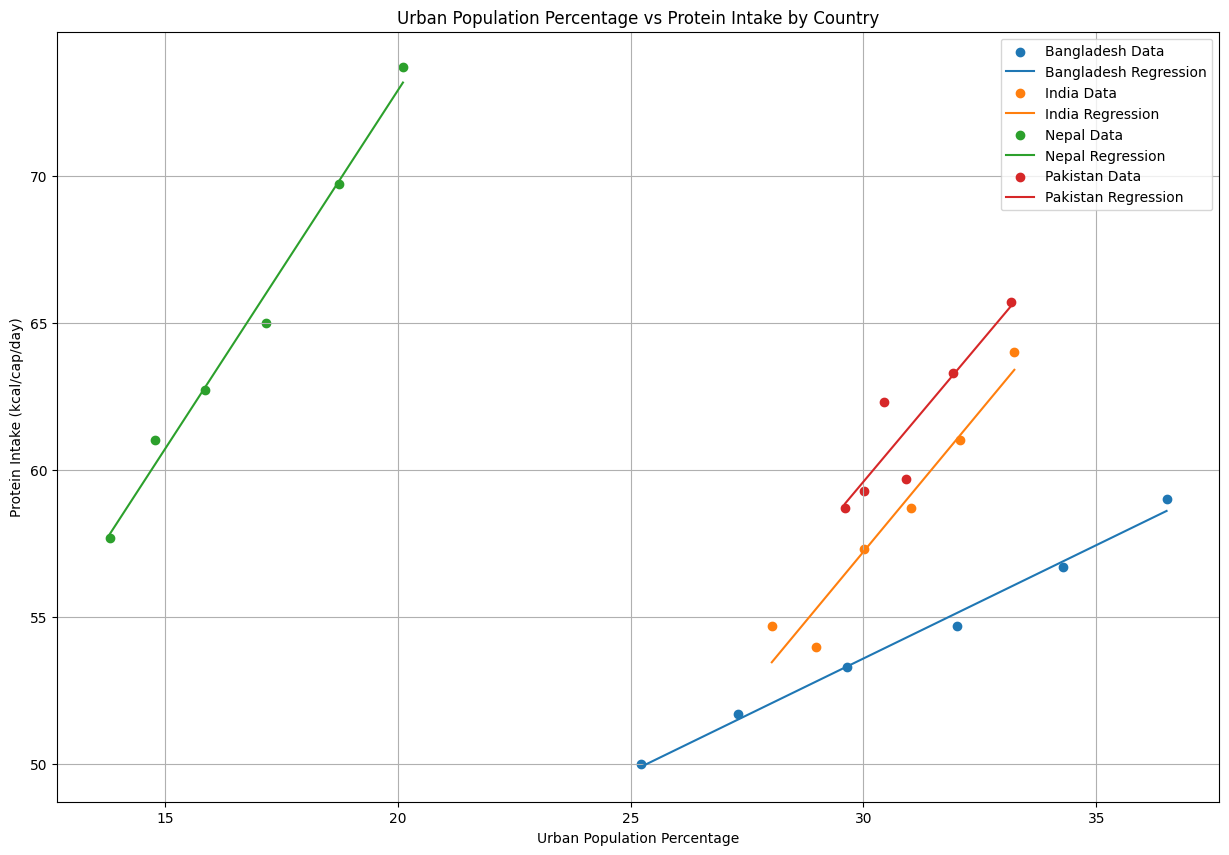

In [ ]:
protein_intake = extract_relevant_data(dietary_data_processed, None, 'Average protein supply (g/cap/day) (3-year average)')
protein_intake_melted = protein_intake.melt(id_vars='Area', var_name='Year', value_name='Protein Intake')

# Merge the datasets
merged_data = pd.merge(pd.merge(urban_population_melted, total_population_melted, on=['Area', 'Year']), protein_intake_melted, on=['Area', 'Year'])

# Calculate Urban Population Percentage
merged_data['Urban Population Percentage'] = (merged_data['Urban Population'] / merged_data['Total Population']) * 100
merged_data['Urban Population Percentage'] = merged_data['Urban Population Percentage'].astype(float)
merged_data['Protein Intake'] = merged_data['Protein Intake'].astype(float)

# Drop NaN values
merged_data.dropna(subset=['Urban Population Percentage', 'Protein Intake'], inplace=True)

plt.figure(figsize=(15, 10))

# Loop through each country and perform regression
for country in merged_data['Area'].unique():
    country_data = merged_data[merged_data['Area'] == country]
    X = country_data['Urban Population Percentage']
    y = country_data['Protein Intake']
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    # Plotting each country's data and regression line
    plt.scatter(country_data['Urban Population Percentage'], country_data['Protein Intake'], label=f'{country} Data')
    plt.plot(country_data['Urban Population Percentage'], predictions, label=f'{country} Regression')

plt.title('Urban Population Percentage vs Protein Intake by Country')
plt.xlabel('Urban Population Percentage')
plt.ylabel('Protein Intake (kcal/cap/day)')
plt.legend()
plt.grid(True)
plt.show()

reset_data()

###### Regression Model of Urban Population and Number of People Undernourished

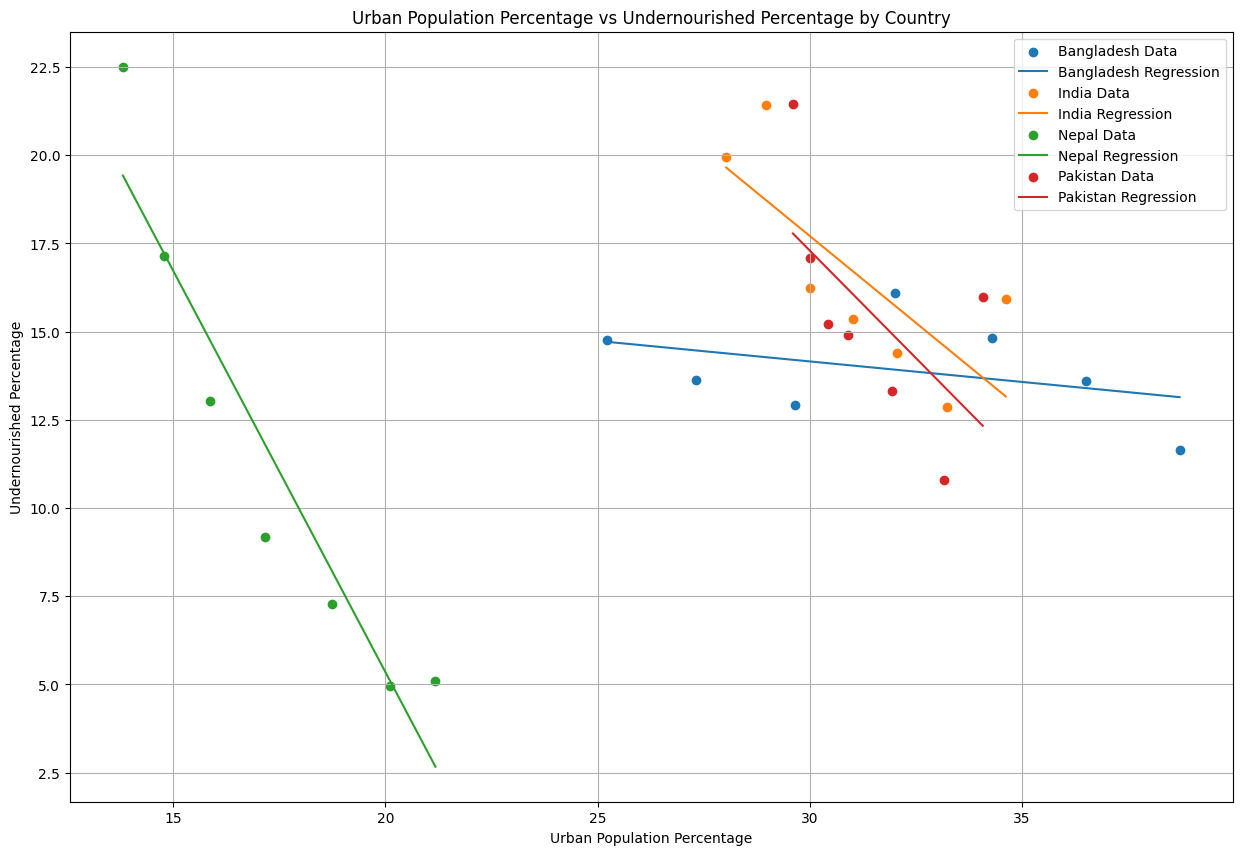

In [ ]:
undernourished = extract_relevant_data(dietary_data_processed, None, 'Number of people undernourished (million) (3-year average)')
undernourished_melted = undernourished.melt(id_vars='Area', var_name='Year', value_name='Undernourished')

merged_data = pd.merge(pd.merge(urban_population_melted, total_population_melted, on=['Area', 'Year']), undernourished_melted, on=['Area', 'Year'])

# Convert to absolute numbers and calculate percentages
merged_data['Urban Population'] = merged_data['Urban Population'] * 1e3
merged_data['Total Population'] = merged_data['Total Population'] * 1e3
merged_data['Undernourished'] = merged_data['Undernourished'].astype(float)
merged_data['Undernourished'] = merged_data['Undernourished'] * 1e6

merged_data['Urban Population Percentage'] = (merged_data['Urban Population'] / merged_data['Total Population']) * 100
merged_data['Undernourished Percentage'] = (merged_data['Undernourished'] / merged_data['Total Population']) * 100

merged_data.dropna(subset=['Urban Population Percentage', 'Undernourished Percentage'], inplace=True)

plt.figure(figsize=(15, 10))

# Loop through each country and perform regression
for country in merged_data['Area'].unique():
    country_data = merged_data[merged_data['Area'] == country]
    X = country_data['Urban Population Percentage']
    y = country_data['Undernourished Percentage']
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    # Plotting each country's data and regression line
    plt.scatter(country_data['Urban Population Percentage'], country_data['Undernourished Percentage'], label=f'{country} Data')
    plt.plot(country_data['Urban Population Percentage'], predictions, label=f'{country} Regression')

plt.title('Urban Population Percentage vs Undernourished Percentage by Country')
plt.xlabel('Urban Population Percentage')
plt.ylabel('Undernourished Percentage')
plt.legend()
plt.grid(True)
plt.show()

reset_data()

#### Trend and Projection Models of Population and Dietary Variables

###### Trend and Projection of Urban Population and Share of dietary energy supply derived from cereals, roots and tubers

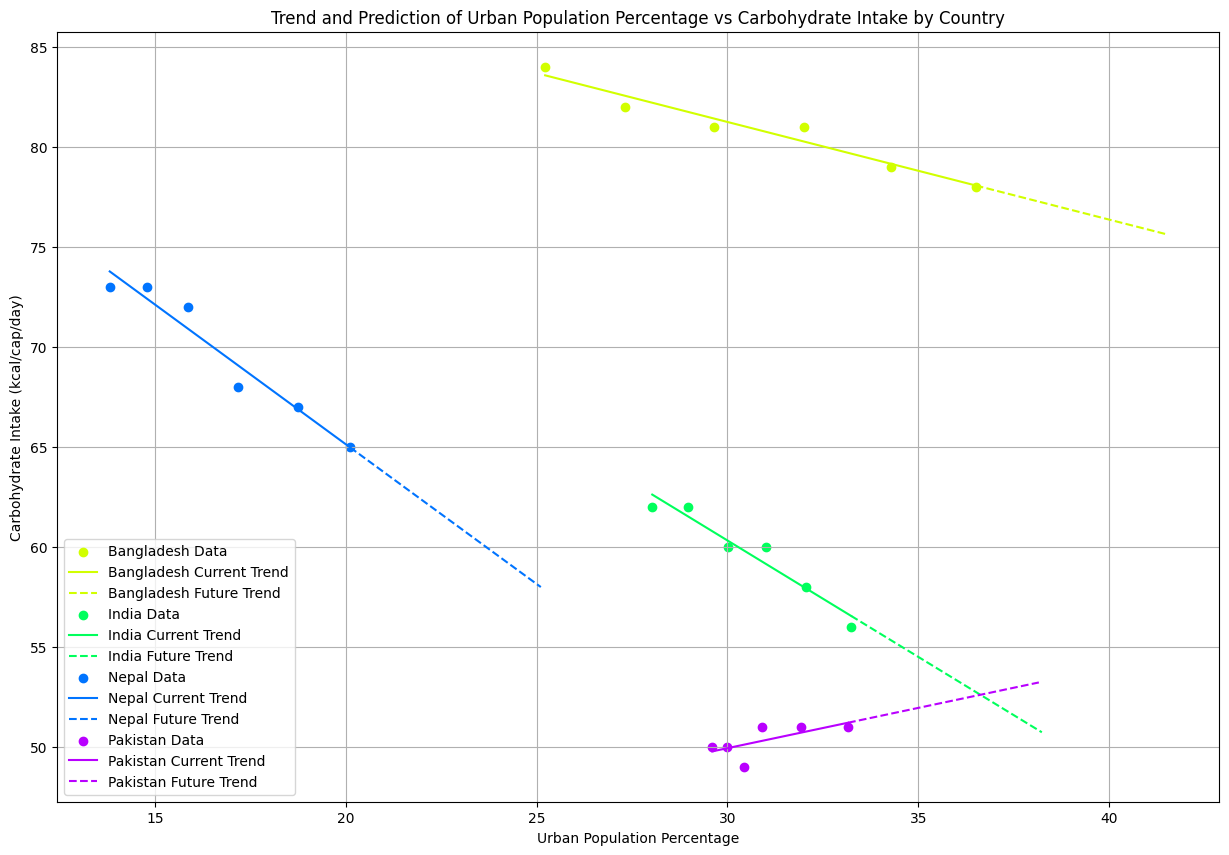

In [ ]:
carbohydrate_intake = extract_relevant_data(dietary_data_processed, None, 'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)')
carbohydrate_intake_melted = carbohydrate_intake.melt(id_vars='Area', var_name='Year', value_name='Carbohydrate Intake')

merged_data = pd.merge(pd.merge(urban_population_melted, total_population_melted, on=['Area', 'Year']), carbohydrate_intake_melted, on=['Area', 'Year'])

# Convert to absolute numbers and calculate percentages
merged_data['Urban Population'] = merged_data['Urban Population'] * 1e3
merged_data['Total Population'] = merged_data['Total Population'] * 1e3
merged_data['Urban Population Percentage'] = (merged_data['Urban Population'] / merged_data['Total Population']) * 100

merged_data.dropna(subset=['Urban Population Percentage', 'Carbohydrate Intake'], inplace=True)

merged_data['Urban Population Percentage'] = pd.to_numeric(merged_data['Urban Population Percentage'])
merged_data['Carbohydrate Intake'] = pd.to_numeric(merged_data['Carbohydrate Intake'])

plt.figure(figsize=(15, 10))

# Generate a color palette, one color per country
palette = sns.color_palette("hsv", len(merged_data['Area'].unique()))
color_map = dict(zip(merged_data['Area'].unique(), palette))

# Loop through each country and calculate trend
for country in merged_data['Area'].unique():
    country_data = merged_data[merged_data['Area'] == country]
    if len(country_data) > 1:
        # Calculate trend for each country
        slope, intercept, r_value, p_value, std_err = linregress(country_data['Urban Population Percentage'], country_data['Carbohydrate Intake'])
        current_urban_percentage = np.array(country_data['Urban Population Percentage'])
        future_urban_percentage = np.linspace(current_urban_percentage.max(), current_urban_percentage.max() + 5, 5)
        trendline_current = intercept + slope * current_urban_percentage
        trendline_future = intercept + slope * future_urban_percentage
        country_color = color_map[country]

        # Plotting each country's data and trend line
        plt.scatter(country_data['Urban Population Percentage'], country_data['Carbohydrate Intake'], color=country_color, label=f'{country} Data')
        plt.plot(current_urban_percentage, trendline_current, color=country_color, label=f'{country} Current Trend')
        plt.plot(future_urban_percentage, trendline_future, '--', color=country_color, label=f'{country} Future Trend')

plt.title('Trend and Prediction of Urban Population Percentage vs Carbohydrate Intake by Country')
plt.xlabel('Urban Population Percentage')
plt.ylabel('Carbohydrate Intake (kcal/cap/day)')
plt.legend()
plt.grid(True)
plt.show()

reset_data()

###### Trend and Projection of Urban Population and Average Dietary Energy Requirement

<ipython-input-44-4a53a09089dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dietary_data[year_columns] = dietary_data[year_columns].apply(pd.to_numeric, errors='coerce')


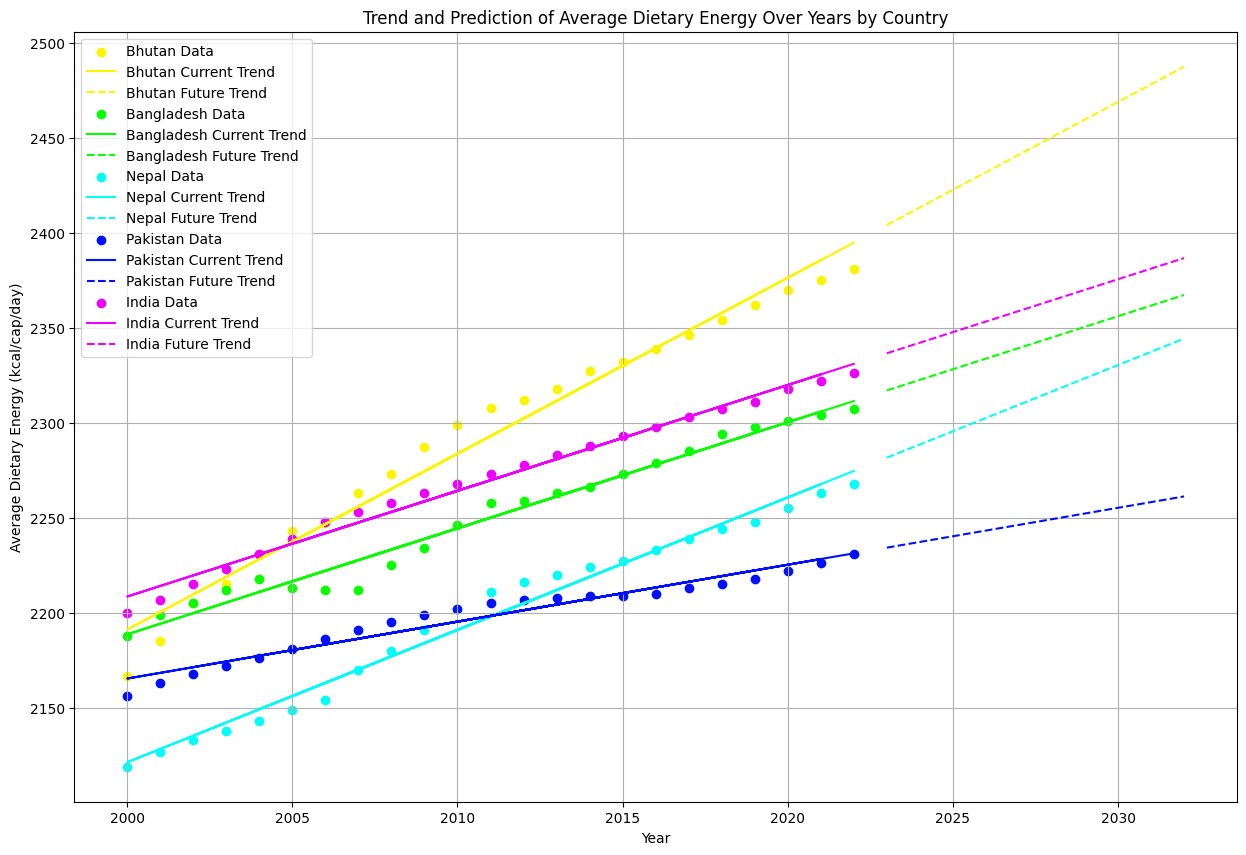

In [ ]:
dietary_data = dietary_data_processed[dietary_data_processed['Item'] == 'Average dietary energy requirement (kcal/cap/day)']

# Convert year columns to numeric and set index to 'Area' for both datasets
year_columns = [col for col in dietary_data.columns if col.startswith('Y') and len(col) == 5]
dietary_data[year_columns] = dietary_data[year_columns].apply(pd.to_numeric, errors='coerce')
dietary_data.set_index('Area', inplace=True)
total_pop_data.set_index('Area', inplace=True)
urban_data.set_index('Area', inplace=True)

merged_data_list = []

# Ensure only matching years and countries are merged
common_years = set(year_columns).intersection(urban_data.columns).intersection(total_pop_data.columns)
common_countries = list(set(dietary_data.index).intersection(urban_data.index).intersection(total_pop_data.index))

for year in common_years:
    # Convert the set to a list when using it as an indexer
    urban_percentage = (urban_data.loc[common_countries, year] / total_pop_data.loc[common_countries, year]) * 100
    temp_df = pd.DataFrame({
        'Area': common_countries,
        'Year': int(year[1:]),
        'AverageDietaryEnergy': dietary_data.loc[common_countries, year].values,
        'UrbanPopulationPercentage': urban_percentage.values
    })
    merged_data_list.append(temp_df)

merged_data = pd.concat(merged_data_list, ignore_index=True)

merged_data.dropna(inplace=True)
merged_data.drop_duplicates(inplace=True)

plt.figure(figsize=(15, 10))

# Generate a color palette, one color per country
palette = sns.color_palette("hsv", len(merged_data['Area'].unique()))
color_map = dict(zip(merged_data['Area'].unique(), palette))

# Loop through each country and perform regression
for country in merged_data['Area'].unique():
    country_data = merged_data[merged_data['Area'] == country]

    slope, intercept, r_value, p_value, std_err = linregress(country_data['Year'], country_data['AverageDietaryEnergy'])

    current_years = np.array(country_data['Year'])
    future_years = np.arange(current_years.max() + 1, current_years.max() + 11)  # Predicting next 10 years

    trendline_current = intercept + (slope * current_years)
    trendline_future = intercept + (slope * future_years)
    country_color = color_map[country]  # Use the unique color for the country

    # Plotting the data and the trendline for each country
    plt.scatter(country_data['Year'], country_data['AverageDietaryEnergy'], color=country_color, label=f'{country} Data')
    plt.plot(current_years, trendline_current, color=country_color, label=f'{country} Current Trend')
    plt.plot(future_years, trendline_future, '--', color=country_color, label=f'{country} Future Trend')

plt.title('Trend and Prediction of Average Dietary Energy Over Years by Country')
plt.xlabel('Year')
plt.ylabel('Average Dietary Energy (kcal/cap/day)')
plt.legend()
plt.grid(True)
plt.show()

reset_data()

###### Trend and Projection of Urban Population and Average Fat Supply

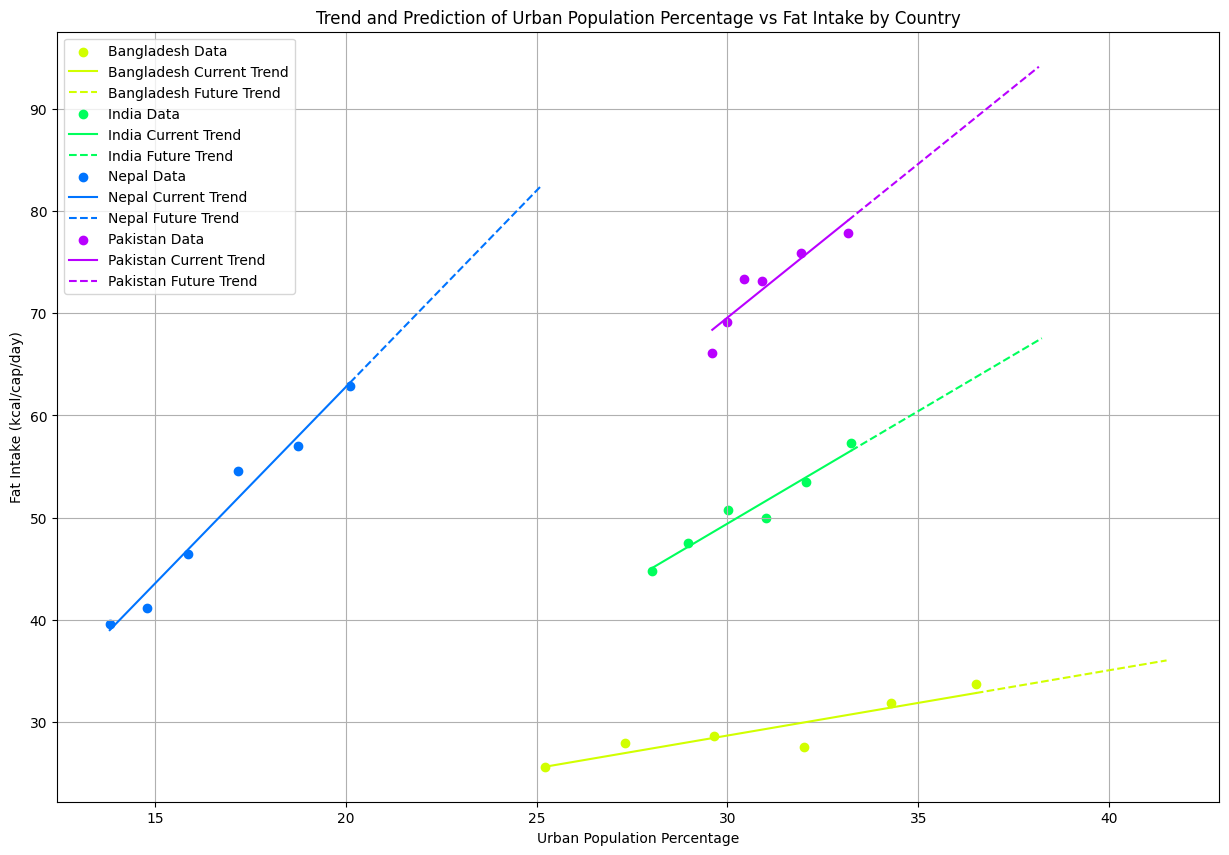

In [ ]:
fat_intake = extract_relevant_data(dietary_data_processed, None, 'Average fat supply (g/cap/day) (3-year average)')
fat_intake_melted = fat_intake.melt(id_vars='Area', var_name='Year', value_name='Fat Intake')

merged_data = pd.merge(pd.merge(urban_population_melted, total_population_melted, on=['Area', 'Year']), fat_intake_melted, on=['Area', 'Year'])

# Convert to absolute numbers and calculate percentages
merged_data['Urban Population'] = merged_data['Urban Population'] * 1e3
merged_data['Total Population'] = merged_data['Total Population'] * 1e3
merged_data['Urban Population Percentage'] = (merged_data['Urban Population'] / merged_data['Total Population']) * 100

merged_data.dropna(subset=['Urban Population Percentage', 'Fat Intake'], inplace=True)

merged_data['Urban Population Percentage'] = pd.to_numeric(merged_data['Urban Population Percentage'])
merged_data['Fat Intake'] = pd.to_numeric(merged_data['Fat Intake'])

plt.figure(figsize=(15, 10))

# Generate a color palette, one color per country
palette = sns.color_palette("hsv", len(merged_data['Area'].unique()))
color_map = dict(zip(merged_data['Area'].unique(), palette))

# Loop through each country and calculate trend
for country in merged_data['Area'].unique():
    country_data = merged_data[merged_data['Area'] == country]
    if len(country_data) > 1:
        # Calculate trend for each country
        slope, intercept, r_value, p_value, std_err = linregress(country_data['Urban Population Percentage'], country_data['Fat Intake'])
        current_urban_percentage = np.array(country_data['Urban Population Percentage'])
        future_urban_percentage = np.linspace(current_urban_percentage.max(), current_urban_percentage.max() + 5, 5)
        trendline_current = intercept + slope * current_urban_percentage
        trendline_future = intercept + slope * future_urban_percentage
        country_color = color_map[country]

        # Plotting each country's data and trend line
        plt.scatter(country_data['Urban Population Percentage'], country_data['Fat Intake'], color=country_color, label=f'{country} Data')
        plt.plot(current_urban_percentage, trendline_current, color=country_color, label=f'{country} Current Trend')
        plt.plot(future_urban_percentage, trendline_future, '--', color=country_color, label=f'{country} Future Trend')

plt.title('Trend and Prediction of Urban Population Percentage vs Fat Intake by Country')
plt.xlabel('Urban Population Percentage')
plt.ylabel('Fat Intake (kcal/cap/day)')
plt.legend()
plt.grid(True)
plt.show()

reset_data()

###### Trend and Projection of Urban Population and Number of Obese Adults

<ipython-input-46-daa3b0c97a72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesity_data[year_columns] = obesity_data[year_columns].apply(pd.to_numeric, errors='coerce')


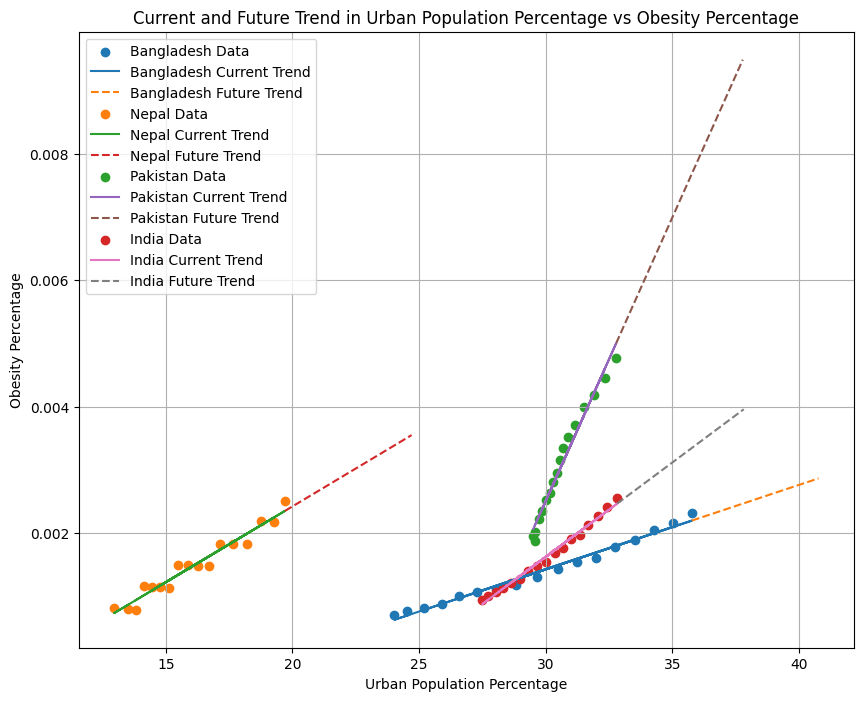

In [ ]:
obesity_data = dietary_data_processed[dietary_data_processed['Item'] == 'Number of obese adults (18 years and older) (million)']

# Convert year columns to numeric and set index to 'Area' for both datasets
year_columns = [col for col in obesity_data.columns if col.startswith('Y') and len(col) == 5]
obesity_data[year_columns] = obesity_data[year_columns].apply(pd.to_numeric, errors='coerce')
obesity_data.set_index('Area', inplace=True)
total_pop_data.set_index('Area', inplace=True)
urban_data.set_index('Area', inplace=True)

merged_data_list = []

# Ensure only matching years and countries are merged
common_years = set(year_columns).intersection(urban_data.columns).intersection(total_pop_data.columns)
common_countries = list(set(obesity_data.index).intersection(urban_data.index).intersection(total_pop_data.index))

for year in common_years:
    obesity_percentage = (obesity_data.loc[common_countries, year] / total_pop_data.loc[common_countries, year]) * 100
    urban_percentage = (urban_data.loc[common_countries, year] / total_pop_data.loc[common_countries, year]) * 100
    temp_df = pd.DataFrame({
        'Area': common_countries,
        'Year': int(year[1:]),
        'ObesityPercentage': obesity_percentage.values,
        'UrbanPopulationPercentage': urban_percentage.values
    })
    merged_data_list.append(temp_df)

merged_data = pd.concat(merged_data_list, ignore_index=True)

merged_data.dropna(inplace=True)
merged_data.drop_duplicates(inplace=True)

plt.figure(figsize=(10, 8))

# Loop through each country and perform regression
for country in merged_data['Area'].unique():
    country_data = merged_data[merged_data['Area'] == country]

    # Perform linear regression for each country
    slope, intercept, r_value, p_value, std_err = linregress(country_data['UrbanPopulationPercentage'], country_data['ObesityPercentage'])

    # Define the current and future urban population percentage range
    current_urban_perc = np.array(country_data['UrbanPopulationPercentage'])
    future_urban_perc = np.linspace(current_urban_perc.max(), current_urban_perc.max() + 5, 5)  # Assume a 5% increase for illustration

    # Calculate the trendline for current and future
    trendline_current = intercept + slope * current_urban_perc
    trendline_future = intercept + slope * future_urban_perc

    # Plotting each country's data and trend line
    plt.scatter(country_data['UrbanPopulationPercentage'], country_data['ObesityPercentage'], label=f'{country} Data')
    plt.plot(current_urban_perc, trendline_current, label=f'{country} Current Trend')
    plt.plot(future_urban_perc, trendline_future, '--', label=f'{country} Future Trend')

plt.title('Current and Future Trend in Urban Population Percentage vs Obesity Percentage')
plt.xlabel('Urban Population Percentage')
plt.ylabel('Obesity Percentage')
plt.legend()
plt.grid(True)
plt.show()

reset_data()

###### Trend and Projection of Urban Population and Average Protein Supply

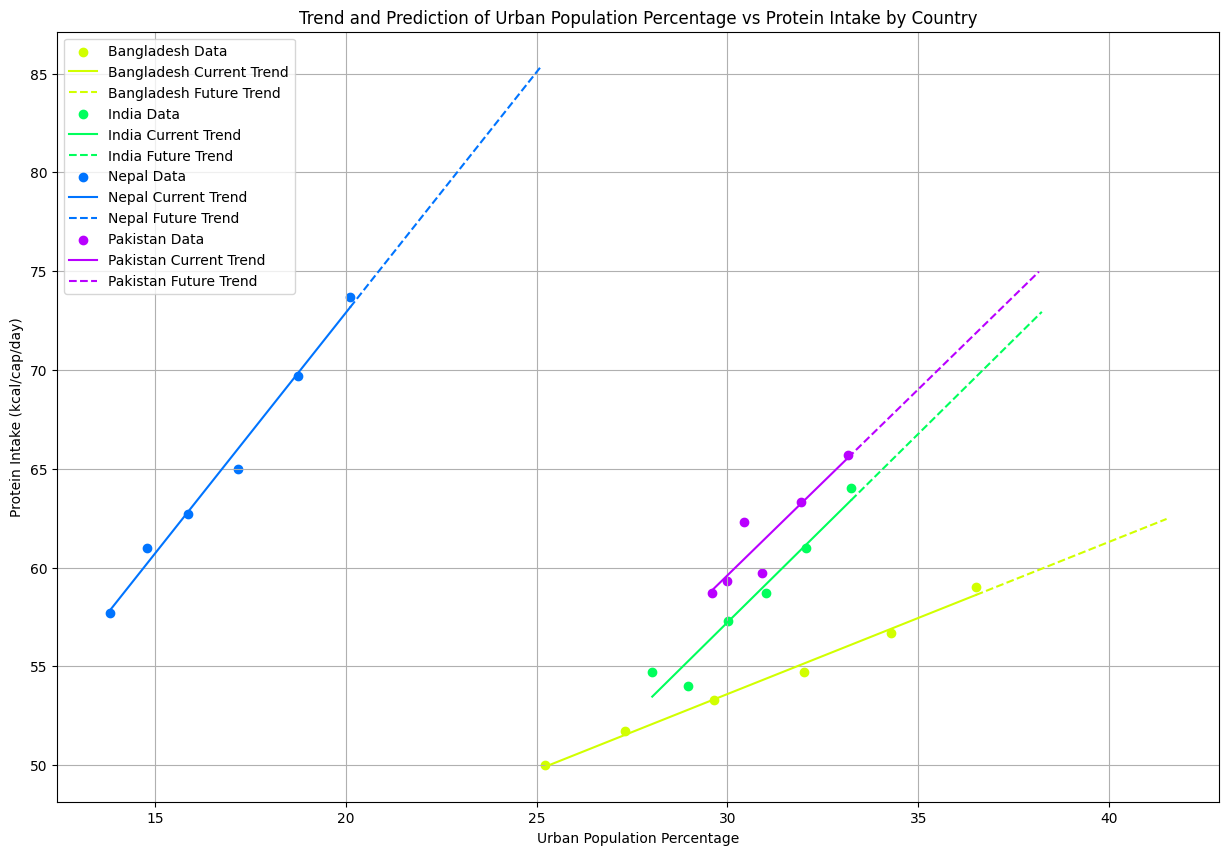

In [ ]:
protein_intake = extract_relevant_data(dietary_data_processed, None, 'Average protein supply (g/cap/day) (3-year average)')
protein_intake_melted = protein_intake.melt(id_vars='Area', var_name='Year', value_name='Protein Intake')

merged_data = pd.merge(pd.merge(urban_population_melted, total_population_melted, on=['Area', 'Year']), protein_intake_melted, on=['Area', 'Year'])

# Convert to absolute numbers and calculate percentages
merged_data['Urban Population'] = merged_data['Urban Population'] * 1e3
merged_data['Total Population'] = merged_data['Total Population'] * 1e3
merged_data['Urban Population Percentage'] = (merged_data['Urban Population'] / merged_data['Total Population']) * 100

merged_data.dropna(subset=['Urban Population Percentage', 'Protein Intake'], inplace=True)

merged_data['Urban Population Percentage'] = pd.to_numeric(merged_data['Urban Population Percentage'])
merged_data['Protein Intake'] = pd.to_numeric(merged_data['Protein Intake'])

plt.figure(figsize=(15, 10))

# Generate a color palette, one color per country
palette = sns.color_palette("hsv", len(merged_data['Area'].unique()))
color_map = dict(zip(merged_data['Area'].unique(), palette))

# Loop through each country and calculate trend
for country in merged_data['Area'].unique():
    country_data = merged_data[merged_data['Area'] == country]
    if len(country_data) > 1:
        # Calculate trend for each country
        slope, intercept, r_value, p_value, std_err = linregress(country_data['Urban Population Percentage'], country_data['Protein Intake'])
        current_urban_percentage = np.array(country_data['Urban Population Percentage'])
        future_urban_percentage = np.linspace(current_urban_percentage.max(), current_urban_percentage.max() + 5, 5)
        trendline_current = intercept + slope * current_urban_percentage
        trendline_future = intercept + slope * future_urban_percentage
        country_color = color_map[country]

        # Plotting each country's data and trend line
        plt.scatter(country_data['Urban Population Percentage'], country_data['Protein Intake'], color=country_color, label=f'{country} Data')
        plt.plot(current_urban_percentage, trendline_current, color=country_color, label=f'{country} Current Trend')
        plt.plot(future_urban_percentage, trendline_future, '--', color=country_color, label=f'{country} Future Trend')

plt.title('Trend and Prediction of Urban Population Percentage vs Protein Intake by Country')
plt.xlabel('Urban Population Percentage')
plt.ylabel('Protein Intake (kcal/cap/day)')
plt.legend()
plt.grid(True)
plt.show()

reset_data()

###### Trend and Projection of Urban Population and Number of People Undernourished

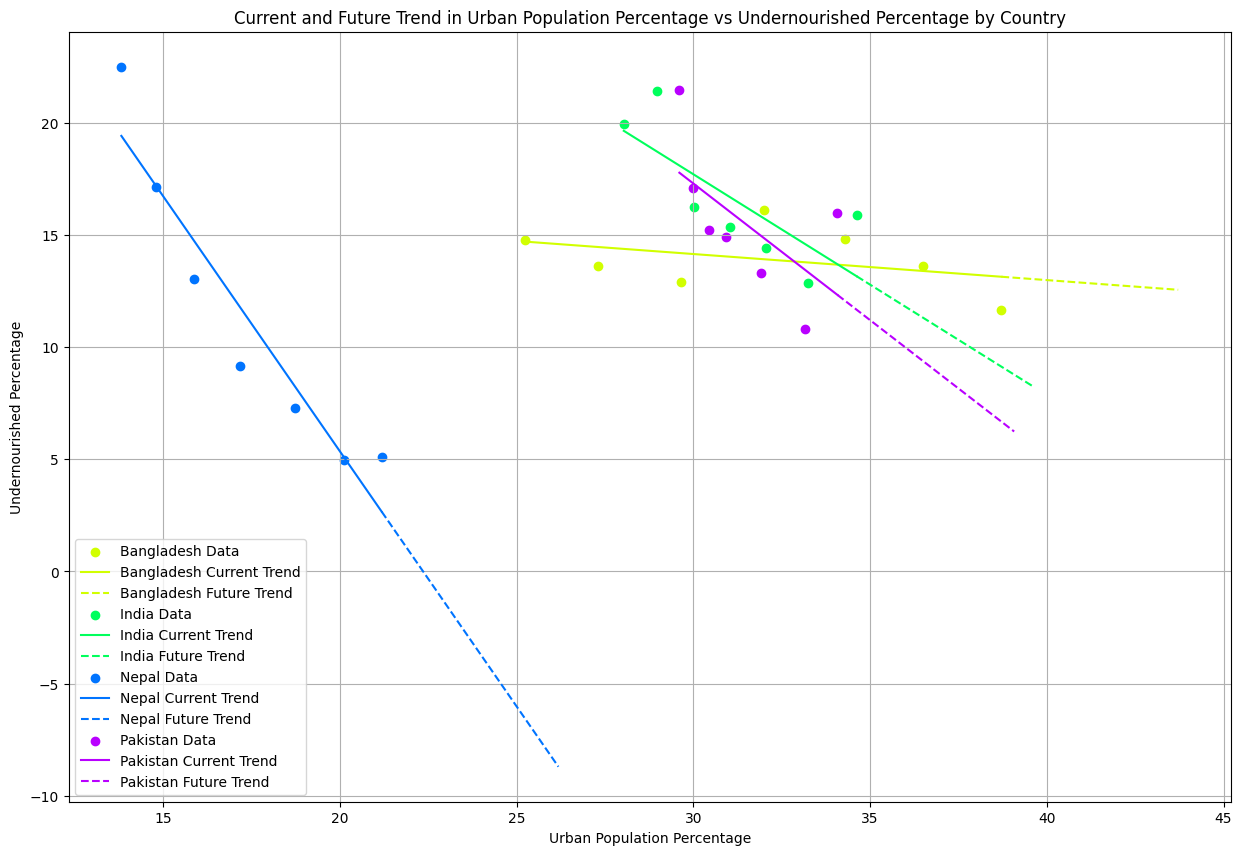

In [ ]:
undernourished = extract_relevant_data(dietary_data_processed, None, 'Number of people undernourished (million) (3-year average)')
undernourished_melted = undernourished.melt(id_vars='Area', var_name='Year', value_name='Undernourished')

merged_data = pd.merge(pd.merge(urban_population_melted, total_population_melted, on=['Area', 'Year']), undernourished_melted, on=['Area', 'Year'])

# Convert to absolute numbers and calculate percentages
merged_data['Urban Population'] = merged_data['Urban Population'] * 1e3
merged_data['Total Population'] = merged_data['Total Population'] * 1e3
merged_data['Undernourished'] = merged_data['Undernourished'].astype(float)
merged_data['Undernourished'] = merged_data['Undernourished'] * 1e6

merged_data['Urban Population Percentage'] = (merged_data['Urban Population'] / merged_data['Total Population']) * 100
merged_data['Undernourished Percentage'] = (merged_data['Undernourished'] / merged_data['Total Population']) * 100

merged_data.dropna(subset=['Urban Population Percentage', 'Undernourished Percentage'], inplace=True)

plt.figure(figsize=(15, 10))

# Generate a color palette, one color per country
palette = sns.color_palette("hsv", len(merged_data['Area'].unique()))
color_map = dict(zip(merged_data['Area'].unique(), palette))

# Loop through each country and calculate trend
for country in merged_data['Area'].unique():
    country_data = merged_data[merged_data['Area'] == country]
    if len(country_data) > 1:
        # Calculate trend for each country
        slope, intercept, r_value, p_value, std_err = linregress(country_data['Urban Population Percentage'], country_data['Undernourished Percentage'])

        # Define current and future urban population percentage range
        current_urban_perc = np.array(country_data['Urban Population Percentage'])
        future_urban_perc = np.linspace(current_urban_perc.max(), current_urban_perc.max() + 5, 5)  # Extend 5% more

        # Calculate trendline for current and future range
        trendline_current = intercept + slope * current_urban_perc
        trendline_future = intercept + slope * future_urban_perc
        country_color = color_map[country]  # Use the unique color for the country

        # Plotting each country's data and trend line
        plt.scatter(country_data['Urban Population Percentage'], country_data['Undernourished Percentage'], color=country_color, label=f'{country} Data')
        plt.plot(current_urban_perc, trendline_current, color=country_color, label=f'{country} Current Trend')
        plt.plot(future_urban_perc, trendline_future, '--', color=country_color, label=f'{country} Future Trend')

plt.title('Current and Future Trend in Urban Population Percentage vs Undernourished Percentage by Country')
plt.xlabel('Urban Population Percentage')
plt.ylabel('Undernourished Percentage')
plt.legend()
plt.grid(True)
plt.show()

reset_data()

#### Correlations of Population Variables

###### Correlation of Urban Population and Share of dietary energy supply derived from cereals, roots and tubers

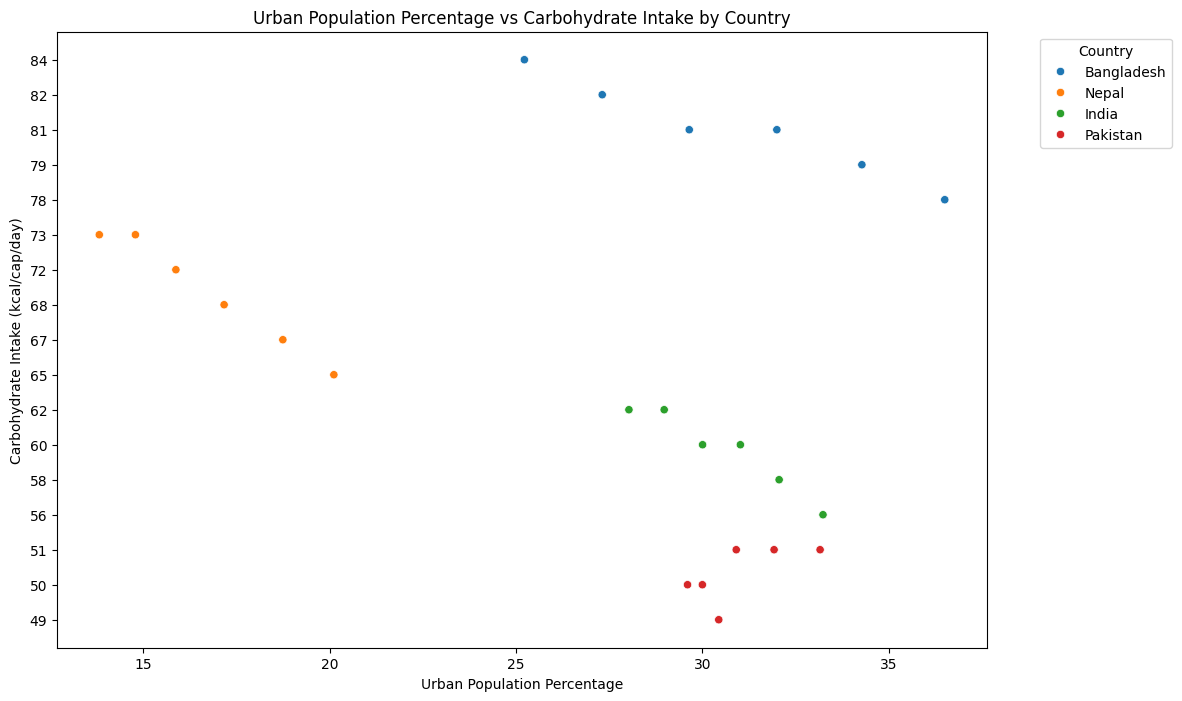

In [ ]:
carbohydrate_intake = extract_relevant_data(dietary_data_processed, None, 'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)')
carbohydrate_intake_melted = carbohydrate_intake.melt(id_vars='Area', var_name='Year', value_name='Carbohydrate Intake')

# Merge the datasets
merged_data = pd.merge(pd.merge(urban_population_melted, total_population_melted, on=['Area', 'Year']), carbohydrate_intake_melted, on=['Area', 'Year'])

# Calculate Urban Population Percentage
merged_data['Urban Population Percentage'] = (merged_data['Urban Population'] / merged_data['Total Population']) * 100
merged_data = merged_data.sort_values(by='Carbohydrate Intake', ascending=False)

# Drop NaN values
merged_data.dropna(subset=['Urban Population Percentage', 'Carbohydrate Intake'], inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Urban Population Percentage', y='Carbohydrate Intake', hue='Area', data=merged_data)
plt.title('Urban Population Percentage vs Carbohydrate Intake by Country')
plt.xlabel('Urban Population Percentage')
plt.ylabel('Carbohydrate Intake (kcal/cap/day)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

reset_data()

###### Correlation of Urban Population and Average Dietary Energy Requirement

<ipython-input-50-ceb14f23386a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dietary_data[year_columns] = dietary_data[year_columns].apply(pd.to_numeric, errors='coerce')


Pearson correlation: 0.7797810947664566, P-value: 9.932596590610635e-25


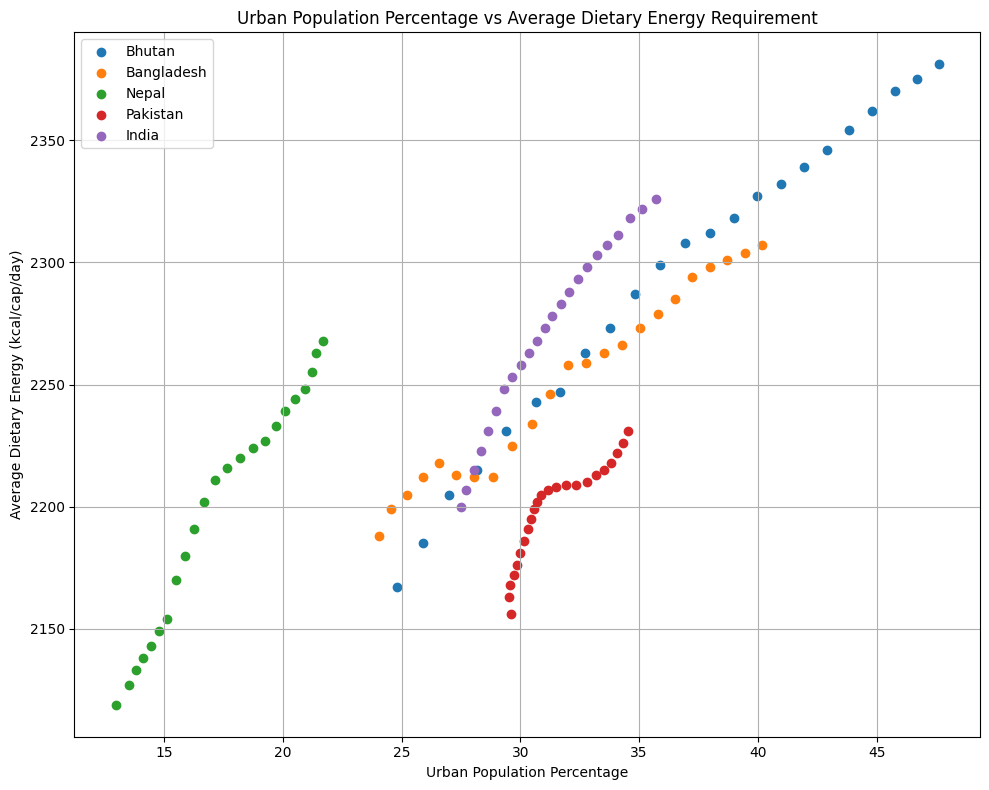

In [ ]:
# Filter for 'Average dietary energy requirement' and 'Urban population'
dietary_data = dietary_data_processed[dietary_data_processed['Item'] == 'Average dietary energy requirement (kcal/cap/day)']

# Convert year columns to numeric and set index to 'Area' for both datasets
year_columns = [col for col in dietary_data.columns if col.startswith('Y') and len(col) == 5]
dietary_data[year_columns] = dietary_data[year_columns].apply(pd.to_numeric, errors='coerce')
dietary_data.set_index('Area', inplace=True)
total_pop_data.set_index('Area', inplace=True)
urban_data.set_index('Area', inplace=True)

merged_data_list = []

# Ensure only matching years and countries are merged
common_years = set(year_columns).intersection(urban_data.columns).intersection(total_pop_data.columns)
common_countries = list(set(dietary_data.index).intersection(urban_data.index).intersection(total_pop_data.index))

for year in common_years:
    # Convert the set to a list when using it as an indexer
    urban_percentage = (urban_data.loc[common_countries, year] / total_pop_data.loc[common_countries, year]) * 100
    temp_df = pd.DataFrame({
        'Area': common_countries,
        'Year': int(year[1:]),
        'AverageDietaryEnergy': dietary_data.loc[common_countries, year].values,
        'UrbanPopulationPercentage': urban_percentage.values
    })
    merged_data_list.append(temp_df)

# Concatenate all dataframes in the list
merged_data = pd.concat(merged_data_list, ignore_index=True)

# Drop rows with NaN values and duplicates
merged_data.dropna(inplace=True)
merged_data.drop_duplicates(inplace=True)

# Calculate Pearson correlation
correlation, p_value = pearsonr(merged_data['AverageDietaryEnergy'], merged_data['UrbanPopulationPercentage'])
print(f'Pearson correlation: {correlation}, P-value: {p_value}')

# Plot with markers for each country
plt.figure(figsize=(10, 8))
for country in merged_data['Area'].unique():
    country_data = merged_data[merged_data['Area'] == country]
    plt.scatter(country_data['UrbanPopulationPercentage'], country_data['AverageDietaryEnergy'], label=country)

plt.title('Urban Population Percentage vs Average Dietary Energy Requirement')
plt.xlabel('Urban Population Percentage')
plt.ylabel('Average Dietary Energy (kcal/cap/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

reset_data()

###### Correlation of Urban Population and Average Fat Supply

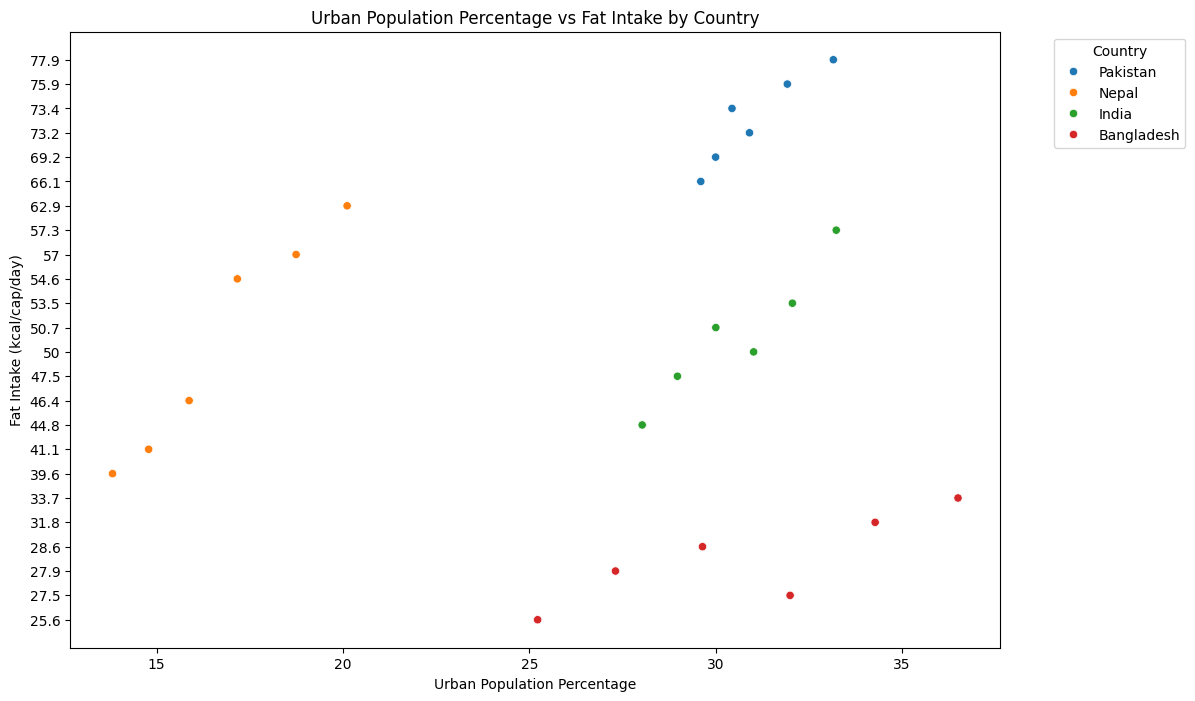

In [ ]:
# Extract data for urban population, total population, and fat intake
fat_intake = extract_relevant_data(dietary_data_processed, None, 'Average fat supply (g/cap/day) (3-year average)')
fat_intake_melted = fat_intake.melt(id_vars='Area', var_name='Year', value_name='Fat Intake')

# Merge the datasets
merged_data = pd.merge(pd.merge(urban_population_melted, total_population_melted, on=['Area', 'Year']), fat_intake_melted, on=['Area', 'Year'])

# Calculate Urban Population Percentage
merged_data['Urban Population Percentage'] = (merged_data['Urban Population'] / merged_data['Total Population']) * 100
merged_data.sort_values(by='Fat Intake', ascending=False, inplace=True)

# Drop NaN values
merged_data.dropna(subset=['Urban Population Percentage', 'Fat Intake'], inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Urban Population Percentage', y='Fat Intake', hue='Area', data=merged_data)
plt.title('Urban Population Percentage vs Fat Intake by Country')
plt.xlabel('Urban Population Percentage')
plt.ylabel('Fat Intake (kcal/cap/day)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

reset_data()

###### Correlation of Urban Population and Number of Obese Adults

<ipython-input-52-aa57c8da4440>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesity_data[year_columns] = obesity_data[year_columns].apply(pd.to_numeric, errors='coerce')


Pearson correlation: 0.45950079580248304, P-value: 8.089427385567994e-05


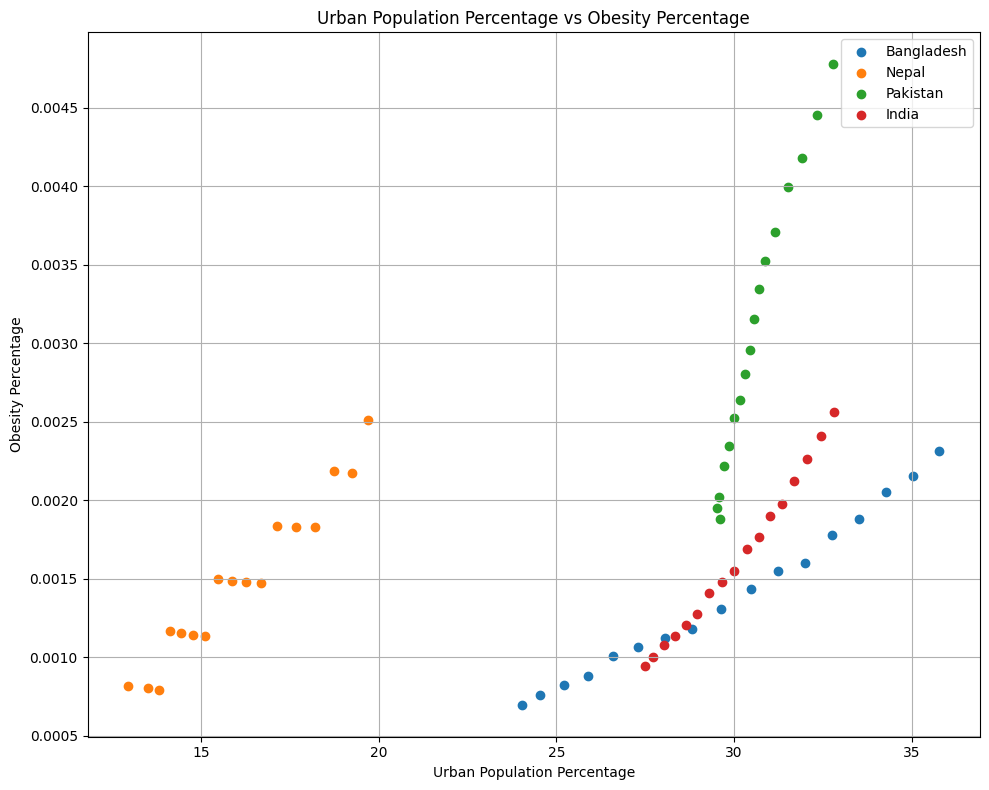

In [ ]:
# Filter for 'Number of obese adults (18 years and older) (million)' and 'Urban population'
obesity_data = dietary_data_processed[dietary_data_processed['Item'] == 'Number of obese adults (18 years and older) (million)']

# Convert year columns to numeric and set index to 'Area' for both datasets
year_columns = [col for col in obesity_data.columns if col.startswith('Y') and len(col) == 5]
obesity_data[year_columns] = obesity_data[year_columns].apply(pd.to_numeric, errors='coerce')
obesity_data.set_index('Area', inplace=True)
total_pop_data.set_index('Area', inplace=True)
urban_data.set_index('Area', inplace=True)

merged_data_list = []

# Ensure only matching years and countries are merged
common_years = set(year_columns).intersection(urban_data.columns).intersection(total_pop_data.columns)
common_countries = list(set(obesity_data.index).intersection(urban_data.index).intersection(total_pop_data.index))

for year in common_years:
    obesity_percentage = (obesity_data.loc[common_countries, year] / total_pop_data.loc[common_countries, year]) * 100
    urban_percentage = (urban_data.loc[common_countries, year] / total_pop_data.loc[common_countries, year]) * 100
    temp_df = pd.DataFrame({
        'Area': common_countries,
        'Year': int(year[1:]),
        'ObesityPercentage': obesity_percentage.values,
        'UrbanPopulationPercentage': urban_percentage.values
    })
    merged_data_list.append(temp_df)

# Concatenate all dataframes in the list
merged_data = pd.concat(merged_data_list, ignore_index=True)

# Drop rows with NaN values and duplicates
merged_data.dropna(inplace=True)
merged_data.drop_duplicates(inplace=True)

# Calculate Pearson correlation
correlation, p_value = pearsonr(merged_data['ObesityPercentage'], merged_data['UrbanPopulationPercentage'])
print(f'Pearson correlation: {correlation}, P-value: {p_value}')

# Plot with markers for each country
plt.figure(figsize=(10, 8))
for country in merged_data['Area'].unique():
    country_data = merged_data[merged_data['Area'] == country]
    plt.scatter(country_data['UrbanPopulationPercentage'], country_data['ObesityPercentage'], label=country)

plt.title('Urban Population Percentage vs Obesity Percentage')
plt.xlabel('Urban Population Percentage')
plt.ylabel('Obesity Percentage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

reset_data()

###### Correlation of Urban Population and Average Protein Supply

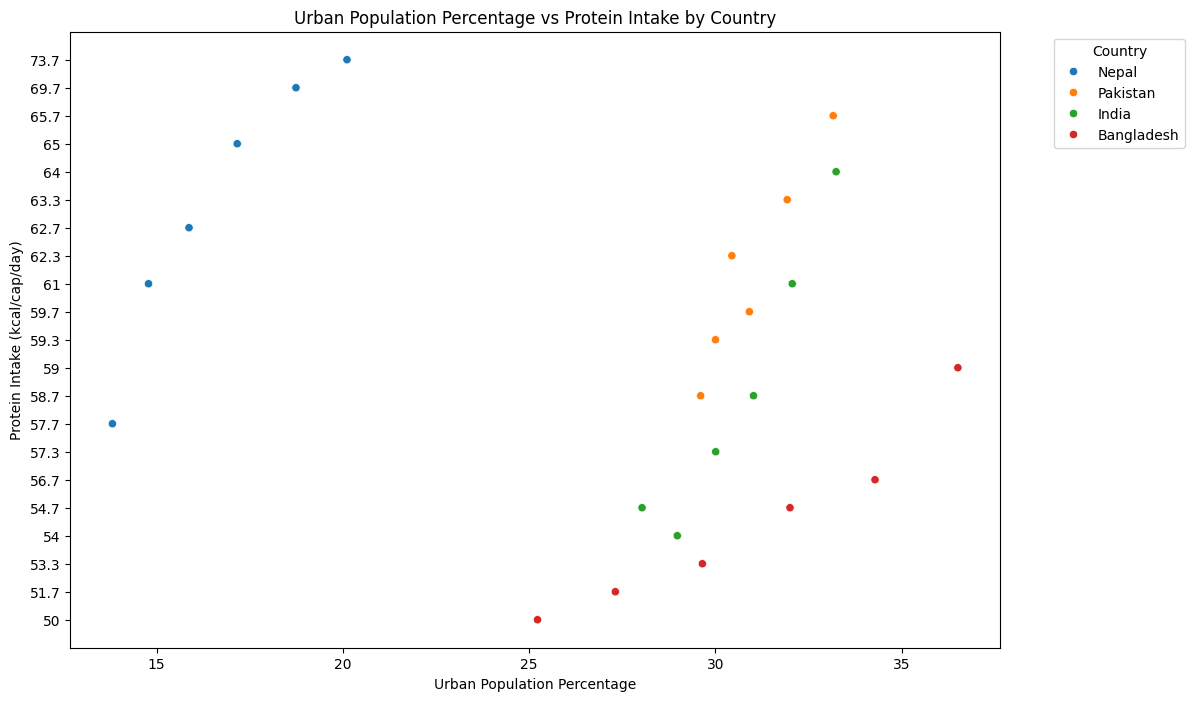

In [ ]:
protein_intake = extract_relevant_data(dietary_data_processed, None, 'Average protein supply (g/cap/day) (3-year average)')
protein_intake_melted = protein_intake.melt(id_vars='Area', var_name='Year', value_name='Protein Intake')

# Merge the datasets
merged_data = pd.merge(pd.merge(urban_population_melted, total_population_melted, on=['Area', 'Year']), protein_intake_melted, on=['Area', 'Year'])

# Calculate Urban Population Percentage
merged_data['Urban Population Percentage'] = (merged_data['Urban Population'] / merged_data['Total Population']) * 100

# Drop NaN values
merged_data.dropna(subset=['Urban Population Percentage', 'Protein Intake'], inplace=True)

# Sort the merged data in descending order by Urban Population Percentage
merged_data.sort_values(by='Protein Intake', ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Urban Population Percentage', y='Protein Intake', hue='Area', data=merged_data)
plt.title('Urban Population Percentage vs Protein Intake by Country')
plt.xlabel('Urban Population Percentage')
plt.ylabel('Protein Intake (kcal/cap/day)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

###### Correlation of Urban Population and Percentage of People Undernourished

Pearson correlation: 0.14694996621123166, P-value: 0.4555468972696713


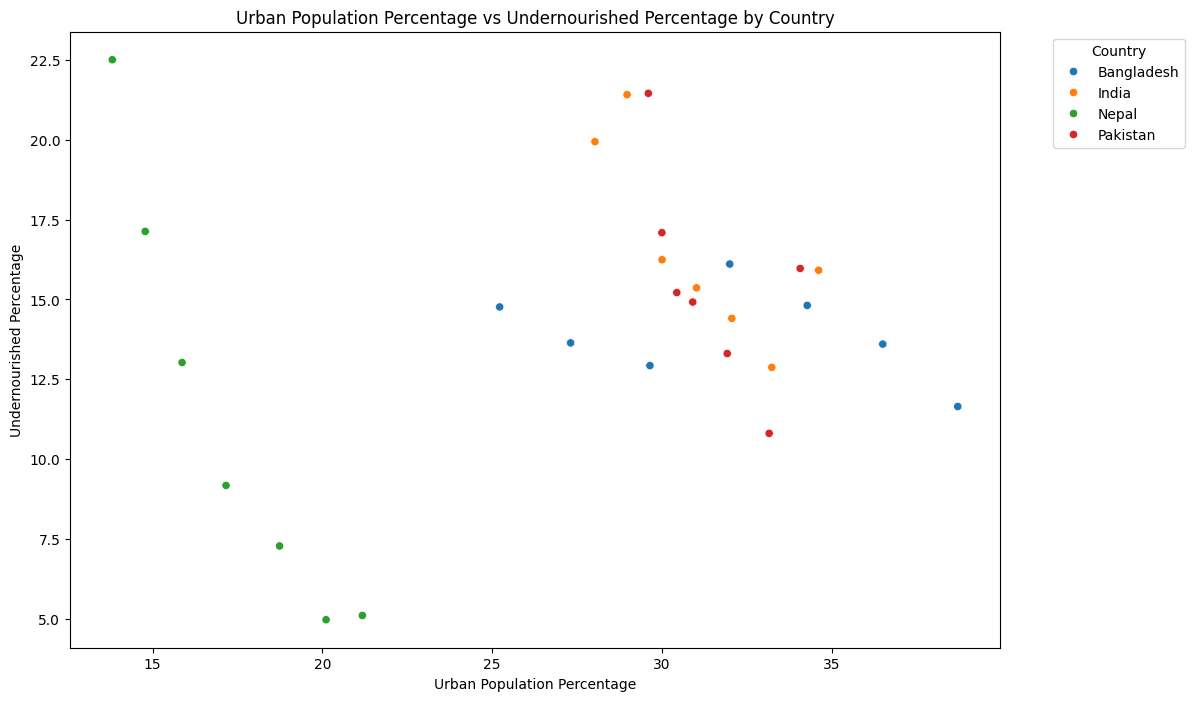

In [ ]:
undernourished = extract_relevant_data(dietary_data_processed, None, 'Number of people undernourished (million) (3-year average)')
undernourished_melted = undernourished.melt(id_vars='Area', var_name='Year', value_name='Undernourished')

# Merge the datasets
merged_data = pd.merge(pd.merge(urban_population_melted, total_population_melted, on=['Area', 'Year']), undernourished_melted, on=['Area', 'Year'])

# Convert urban and total populations from thousands to absolute numbers and calculate percentages
merged_data['Urban Population'] = merged_data['Urban Population'] * 1e3  # Convert from thousands to absolute numbers
merged_data['Total Population'] = merged_data['Total Population'] * 1e3  # Convert from thousands to absolute numbers
merged_data['Undernourished'] = merged_data['Undernourished'].astype(float)
merged_data['Undernourished'] = merged_data['Undernourished'] * 1e6  # Convert from million to absolute numbers

merged_data['Urban Population Percentage'] = (merged_data['Urban Population'] / merged_data['Total Population']) * 100
merged_data['Undernourished Percentage'] = (merged_data['Undernourished'] / merged_data['Total Population']) * 100

# Drop NaN values
merged_data.dropna(subset=['Urban Population Percentage', 'Undernourished Percentage'], inplace=True)

# Calculate Pearson correlation
correlation, p_value = pearsonr(merged_data['Urban Population Percentage'], merged_data['Undernourished Percentage'])
print(f'Pearson correlation: {correlation}, P-value: {p_value}')

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Urban Population Percentage', y='Undernourished Percentage', hue='Area', data=merged_data)
plt.title('Urban Population Percentage vs Undernourished Percentage by Country')
plt.xlabel('Urban Population Percentage')
plt.ylabel('Undernourished Percentage')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Results

Based on the analysis of the trends and projections from the data models, the following conclusions can be drawn regarding the impact of urbanization on dietary patterns in South Asia:

1. **Urbanization and Undernourishment**:
    - The trend analysis indicates that increased urbanization is associated with a decrease in undernourishment rates. This could suggest that urban settings offer improved access to food resources, higher income levels, and better distribution systems that contribute to enhanced food security.

2. **Urbanization and Fat Intake**:
    - The data reveals a positive correlation between the urban population percentage and fat intake, implying that urban residents tend to consume diets higher in fats. This could reflect greater availability and affordability of diverse food types, including processed and high-calorie foods that are more prevalent in urban environments.

3. **Urbanization and Carbohydrate Intake**:
    - There is a variable impact on carbohydrate intake, with some countries like Bangladesh showing a decrease with urbanization. This may indicate a dietary transition in urban areas where there is a shift towards higher protein and fat diets, potentially at the expense of traditional carbohydrate-heavy foods.

4. **Urbanization and Obesity Rates**:
    - The models show a significant positive correlation between urban population growth and obesity rates. This suggests that the lifestyle in urban areas, which might include more sedentary behavior and availability of calorie-dense foods, is contributing to a rise in obesity.

5. **Urbanization and Protein Intake**:
    - The analysis suggests a consistent increase in protein intake as the urban population grows. This positive trend indicates that urbanization may lead to improved dietary quality in terms of protein-rich foods, which are essential for good health.

6. **Urbanization and Average Daily Energy Intake**
    -  The model indicates a consistent increase in average dietary energy (caloric intake) in all countries studied, with future projections up to 2030 suggesting this upward trend will continue. Particularly, Bangladesh, India, and Bhutan are shown to have the most significant projected increases in caloric intake. This trend is in line with global urbanization patterns, where increased access to food variety and the convenience of food choices in urban settings lead to higher caloric consumption.

### Concluding Remarks

   Urbanization in South Asia appears to be a double-edged sword concerning dietary intake. On one side, it is correlated with reductions in undernourishment and increased intake of essential nutrients such as proteins. On the other, it is linked to higher consumption of fats and a worrying increase in obesity rates. These findings highlight the need for targeted public health interventions in urban areas to promote balanced diets and healthy lifestyles, addressing the nutritional challenges posed by rapid urbanization. Future policies should aim to harness the benefits of urbanization for improving food security while mitigating its adverse effects on dietary health.